<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Шаг-1.-Откроем-файлы-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Шаг-1.-Откроем-файлы-с-данными-и-изучим-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откроем файлы с данными и изучим общую информацию</a></span></li><li><span><a href="#Шаг-2.-Предобработаем-данные" data-toc-modified-id="Шаг-2.-Предобработаем-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработаем данные</a></span></li><li><span><a href="#Шаг-3.-Анализ-данных" data-toc-modified-id="Шаг-3.-Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Анализ данных</a></span></li><li><span><a href="#Шаг-4.-Проектирование-дашборда" data-toc-modified-id="Шаг-4.-Проектирование-дашборда-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Проектирование дашборда</a></span></li><li><span><a href="#Шаг-5.-Сегментация-участников-на-основе-просмотра-мероприятий" data-toc-modified-id="Шаг-5.-Сегментация-участников-на-основе-просмотра-мероприятий-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Сегментация участников на основе просмотра мероприятий</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Анализ трансляций "Национального медицинского исследовательского центра"

### Описание проекта
В "Национальном медицинском исследовательском центре" проводят регулярные трансляции и вебинары для врачей, посвященные новым технологиям и методам в сфере лечения онкологии. Эти вебинары позволяют врачам из разных уголков страны получать свежую, актуальную информацию о современных методах лечения этого класса заболеваний. Вебинары проводятся в рамках больших ежегодных форумов и небольших тематических мероприятий. Необходимо обработать данные по посещаемости вебинаров, проводимых НМИЦ для дальнейшего исследования.

**Цель исследования**:
- обработать данные по посещаемости вебинаров;
- определить наиболее интересные/неинтересные темы, популярных спикеров, популярные направления мероприятий;
- построить наглядные визуализации, которые могут лечь в основу дашборда по мероприятиям;
- предоставить рекомендации по наполнению для будущих мероприятий.

### Описание данных

Файл с данными о посещениях форумов и небольших мероприятий:
- Все мероприятия.csv - содержит информацию по просмотрам мероприятий пользователями, а именно id пользователя, город, профессия, специализация, когда начал и когда закончил просмотр, общее время просмотра, поток, устройство, операционная система, браузер, ip, id сессии, мероприятие.

Таблицы с расписанием мероприятий:

- Расписание выступлений 11.xlsx, Расписание выступлений 12.xlsx, Расписание_небольших_мероприятий.xlsx - содержат название доклада, спикера, учреждение, в котором он работает и город, поток, время начала и конца мероприятия, продолжительность.

Классификация мероприятий:

- Словарь рубрик 11-12.xlsx - рубрикатор, который позволяет определить, к какому направлению относится тот или иной доклад, содержит информацию о дате мероприятия, времени начала и окончания, потоке, название сессии, код классификатора и направление.

## Шаг 1. Откроем файлы с данными и изучим общую информацию

In [1]:
# импорт библиотек
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200) # сброс ограничений на количество символов в записи
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash, dcc, html, Input, Output

In [2]:
# загрузим файлы
df = pd.read_csv('C:/Users/fima3/Documents/Onco_project/Project NDA/датасет NDA/данные/Все мероприятия.csv', sep=';')
tt_small = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project NDA/датасет NDA/данные/Расписание_небольших_мероприятий.xlsx')
tt_11 = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project NDA/датасет NDA/данные/Расписание выступлений 11.xlsx') 
tt_12 = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project NDA/датасет NDA/данные/Расписание выступлений 12.xlsx')
rubricator = pd.read_excel('C:/Users/fima3/Documents/Onco_project/Project NDA/датасет NDA/данные/Словарь рубрик 11-12.xlsx', header=2)

In [3]:
# напишем функцию для просмотра общей информации, статистики и первых строк каждого датасета
def info(df):
    """возвращает все атрибуты, пропуски, дубликаты, статистику и первые 5 строк датасета, переданного в качестве параметра"""
    df.info()
    display(df.shape)
    display(df.head())
    print('\n Пропуски в столбцах \n', df.isna().sum())
    print('\n Дубликаты', df.duplicated().sum())
    return df.describe()

In [4]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154333 entries, 0 to 154332
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UID                         134779 non-null  float64
 1   OID                         135694 non-null  float64
 2   BARCODE                     135694 non-null  object 
 3   COUNTRY                     127206 non-null  object 
 4   REGION                      118648 non-null  object 
 5   CITY                        133047 non-null  object 
 6   PROFESSION                  133191 non-null  object 
 7   SPECIALIZATION              131793 non-null  object 
 8   Общее время просомтра, мин  135694 non-null  float64
 9   ПОТОК                       135694 non-null  float64
 10  Устройство                  135694 non-null  object 
 11  Оп.сис                      135693 non-null  object 
 12  Броузер                     135693 non-null  object 
 13  Время начала  

(154333, 27)

UID       OID               BARCODE COUNTRY         REGION CITY  \
0  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
1  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
2  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
3  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
4  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   

  PROFESSION             SPECIALIZATION  Общее время просомтра, мин  ПОТОК  \
0       Врач  онкология: хирургия (огш)                        52.0    1.0   
1       Врач  онкология: хирургия (огш)                        52.0    1.0   
2       Врач  онкология: хирургия (огш)                        52.0    1.0   
3       Врач  онкология: хирургия (огш)                        52.0    1.0   
4       Врач  онкология: хирургия (огш)                        52.0    1.0   

  Устройство   Оп.сис Броузер      Время начала   Время окончания  \
0    Десктоп  Windows  Chrome   13.03.2022 9:42   13.03.2022 9:44   
1    Десктоп  Windows  Chrome   13.03.2022 9:51   13.03.2022 9:51   
2    Десктоп  Windows  Chrome   13.03.2022 9:51   13.03.2022 9:54   
3    Десктоп  Windows  Chrome   13.03.2022 9:54  13.03.2022 10:09   
4    Десктоп  Windows  Chrome  13.03.2022 10:10  13.03.2022 10:14   

   Timestamp начала  Timestamp окончания Время просомтра, мин  Кол-во кликов  \
0        1647153750           1647153857                    2            NaN   
1        1647154294           1647154297               3 сек.            NaN   
2        1647154302           1647154495                    3            NaN   
3        1647154497           1647155385                   15            NaN   
4        1647155406           1647155697                    5            NaN   

  ID открытой сессии ID закрытой сессии  IP  Unnamed: 22  \
0                NaN     vEg3gydkv6KzcG NaN          NaN   
1                NaN     vEg3gydkv6KzcG NaN          NaN   
2                NaN     bquNyVcL7eCLeE NaN          NaN   
3                NaN     bquNyVcL7eCLeE NaN          NaN   
4                NaN     bquNyVcL7eCLeE NaN          NaN   

                  SERVER SESSION ID     Статус открытия Статус закрытия  \
0  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START   DESTROY_PAUSE   
1  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE             NaN   
2  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu          PLAY_START    DESTROY_STOP   
3  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   PLAY_RESTART_STOP   DESTROY_PAUSE   
4  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  PLAY_RESTART_PAUSE   DESTROY_PAUSE   

     Мероприятие  
0  Мероприятие 1  
1  Мероприятие 1  
2  Мероприятие 1  
3  Мероприятие 1  
4  Мероприятие 1


 Пропуски в столбцах 
 UID                            19554
OID                            18639
BARCODE                        18639
COUNTRY                        27127
REGION                         35685
CITY                           21286
PROFESSION                     21142
SPECIALIZATION                 22540
Общее время просомтра, мин     18639
ПОТОК                          18639
Устройство                     18639
Оп.сис                         18640
Броузер                        18640
Время начала                       0
Время окончания                    0
Timestamp начала                   0
Timestamp окончания                0
Время просомтра, мин           18639
Кол-во кликов                 146971
ID открытой сессии            147629
ID закрытой сессии             28562
IP                            154333
Unnamed: 22                   154333
SERVER SESSION ID              18639
Статус открытия                82315
Статус закрытия                69443
Мероприятие   

UID            OID  Общее время просомтра, мин  \
count  134779.000000  135694.000000               135694.000000   
mean     9520.471327  713411.674695                  137.275097   
std      6576.852007  194064.854739                  171.408109   
min       160.000000  506402.000000                    0.000000   
25%      3323.000000  530290.000000                    0.000000   
50%      9523.000000  550477.000000                   40.000000   
75%     15049.000000  921002.000000                  272.000000   
max     22659.000000  994511.000000                 1660.000000   

               ПОТОК  Timestamp начала  Timestamp окончания  Кол-во кликов  \
count  135694.000000      1.543330e+05         1.543330e+05     7362.00000   
mean        3.149100      1.467013e+09         1.467016e+09        1.67210   
std         2.275562      5.449299e+08         5.449311e+08        1.53996   
min         1.000000     -1.607040e+07        -1.607040e+07        1.00000   
25%         1.000000      1.656746e+09         1.656747e+09        1.00000   
50%         3.000000      1.657012e+09         1.657013e+09        1.00000   
75%         4.000000      1.682757e+09         1.682758e+09        2.00000   
max        11.000000      1.683044e+09         1.683044e+09       55.00000   

        IP  Unnamed: 22  
count  0.0          0.0  
mean   NaN          NaN  
std    NaN          NaN  
min    NaN          NaN  
25%    NaN          NaN  
50%    NaN          NaN  
75%    NaN          NaN  
max    NaN          NaN

In [5]:
info(tt_small)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 54 non-null     datetime64[ns]
 1   datestart_lectures   53 non-null     datetime64[ns]
 2   datefinish_lectures  54 non-null     datetime64[ns]
 3   duration_mins        53 non-null     object        
 4   lecture_name         54 non-null     object        
 5   speaker_name         54 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.7+ KB


(54, 6)

date  datestart_lectures datefinish_lectures  duration_mins  \
0 2022-03-13 2022-03-13 10:00:00 2022-03-13 11:15:00  10:00 – 11:15   
1 2022-03-14 2022-03-14 11:00:00 2022-03-14 11:30:00    11:00-11:20   
2 2022-03-14 2022-03-14 11:30:00 2022-03-14 12:00:00    11:30-11:50   
3 2022-03-14 2022-03-14 12:00:00 2022-03-14 12:30:00    12:00-12:20   
4 2022-03-14 2022-03-14 12:30:00 2022-03-14 13:00:00            NaN   

  lecture_name                      speaker_name  
0       Тема 1             Ямаева Анна Даниловна  
1       Тема 2  Михальчишина Эльвира Ярославовна  
2       Тема 3             Ямаева Анна Даниловна  
3       Тема 4        Кобранов Валерий Артемович  
4       Тема 5       Рыбачев Владислав Артурович


 Пропуски в столбцах 
 date                   0
datestart_lectures     1
datefinish_lectures    0
duration_mins          1
lecture_name           0
speaker_name           0
dtype: int64

 Дубликаты 0


date   datestart_lectures  datefinish_lectures  \
count                    54                   53                   54   
unique                    8                   53                   54   
top     2023-04-15 00:00:00  2022-03-13 10:00:00  2022-03-13 11:15:00   
freq                     16                    1                    1   
first   2022-03-13 00:00:00  2022-03-13 10:00:00  2022-03-13 11:15:00   
last    2023-04-15 00:00:00  2023-04-15 16:50:00  2023-04-15 17:10:00   

       duration_mins lecture_name              speaker_name  
count             53           54                        54  
unique            48           53                        48  
top     15:20-15:35        Тема 7  Джин Геннадий Степанович  
freq               2            2                         3  
first            NaN          NaN                       NaN  
last             NaN          NaN                       NaN

In [6]:
info(tt_11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Время начала
(UTC+3 МСК)      1331 non-null   object 
 1   Время окончания 
(UTC+3 МСК)  1330 non-null   object 
 2   Продолжительность             1312 non-null   object 
 3   Дата                          1349 non-null   object 
 4   Поток                         1347 non-null   object 
 5   Название доклада              1339 non-null   object 
 6   ФИО полностью                 744 non-null    object 
 7   Учреждение/Организация        0 non-null      float64
 8   Город                         733 non-null    object 
dtypes: float64(1), object(8)
memory usage: 95.0+ KB


(1350, 9)

Время начала\n(UTC+3 МСК) Время окончания \n(UTC+3 МСК) Продолжительность  \
0                  10:00:00                      10:20:00          00:20:00   
1                  10:20:00                      10:25:00          00:05:00   
2                  10:25:00                      10:45:00          00:20:00   
3                  10:45:00                      10:50:00          00:05:00   
4                  10:50:00                      11:10:00          00:20:00   

                  Дата     Поток Название доклада  \
0  2022-07-01 00:00:00  1 поток           Тема 54   
1  2022-07-01 00:00:00  1 поток         Дискуссия   
2  2022-07-01 00:00:00  1 поток           Тема 56   
3  2022-07-01 00:00:00  1 поток         Дискуссия   
4  2022-07-01 00:00:00  1 поток           Тема 57   

                     ФИО полностью  Учреждение/Организация            Город  
0       Самборский Илья Филиппович                     NaN  Санкт-Петербург  
1                              NaN                     NaN              NaN  
2     Шашина Марина Константиновна                     NaN           Москва  
3                              NaN                     NaN              NaN  
4  Кабылбекова Ангелина Руслановна                     NaN  Санкт-Петербург


 Пропуски в столбцах 
 Время начала\n(UTC+3 МСК)          19
Время окончания \n(UTC+3 МСК)      20
Продолжительность                  38
Дата                                1
Поток                               3
Название доклада                   11
ФИО полностью                     606
Учреждение/Организация           1350
Город                             617
dtype: int64

 Дубликаты 1


Учреждение/Организация
count                     0.0
mean                      NaN
std                       NaN
min                       NaN
25%                       NaN
50%                       NaN
75%                       NaN
max                       NaN

In [7]:
info(tt_12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Время начала
(UTC+3 МСК)      1520 non-null   object        
 1   Время окончания 
(UTC+3 МСК)  1520 non-null   object        
 2   Продолжительность             1511 non-null   object        
 3   Дата                          1567 non-null   datetime64[ns]
 4   Поток                         1567 non-null   object        
 5   Название доклада              1533 non-null   object        
 6   ФИО полностью                 907 non-null    object        
 7   Учреждение/Организация        0 non-null      float64       
 8   Город                         894 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 110.3+ KB


(1567, 9)

Время начала\n(UTC+3 МСК) Время окончания \n(UTC+3 МСК) Продолжительность  \
0                  11:00:00                      11:05:00          00:05:00   
1                  11:05:00                      11:10:00          00:05:00   
2                  11:10:00                      11:15:00          00:05:00   
3                  11:15:00                      11:20:00          00:05:00   
4                  11:20:00                      11:25:00          00:05:00   

        Дата Поток      Название доклада                    ФИО полностью  \
0 2023-04-27     -  Приветственное слово       Клюйко Эльмира Григорьевна   
1 2023-04-27     -  Приветственное слово       Дударенко Аркадий Глебович   
2 2023-04-27     -  Приветственное слово         Бобрищев Марат Ринатович   
3 2023-04-27     -  Приветственное слово  Толстоброва Виктория Тимофеевна   
4 2023-04-27     -  Приветственное слово       Карабаева Жанна Георгиевна   

   Учреждение/Организация            Город  
0                     NaN  Санкт-Петербург  
1                     NaN           Москва  
2                     NaN              NaN  
3                     NaN  Санкт-Петербург  
4                     NaN  Санкт-Петербург


 Пропуски в столбцах 
 Время начала\n(UTC+3 МСК)          47
Время окончания \n(UTC+3 МСК)      47
Продолжительность                  56
Дата                                0
Поток                               0
Название доклада                   34
ФИО полностью                     660
Учреждение/Организация           1567
Город                             673
dtype: int64

 Дубликаты 15


Учреждение/Организация
count                     0.0
mean                      NaN
std                       NaN
min                       NaN
25%                       NaN
50%                       NaN
75%                       NaN
max                       NaN

In [8]:
info(rubricator)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Год                 343 non-null    int64         
 1   Столбец2            343 non-null    datetime64[ns]
 2   Поток               343 non-null    object        
 3   Начало              343 non-null    object        
 4   Конец               327 non-null    object        
 5   Столбец1            342 non-null    object        
 6   Код классификатора  343 non-null    object        
 7   Столбец12           343 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 21.6+ KB


(343, 8)

Год   Столбец2     Поток   Начало      Конец  Столбец1 Код классификатора  \
0  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Основное    
1  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Нозологии   
2  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Основное    
3  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Нозологии   
4  2022 2022-07-01  1 поток   15:30:00  17:25:00  Сессия 3          Основное    

       Столбец12  
0  Направление 1  
1  Направление 2  
2  Направление 3  
3  Направление 2  
4  Направление 4


 Пропуски в столбцах 
 Год                    0
Столбец2               0
Поток                  0
Начало                 0
Конец                 16
Столбец1               1
Код классификатора     0
Столбец12              0
dtype: int64

 Дубликаты 1


Год
count   343.000000
mean   2022.516035
std       0.500473
min    2022.000000
25%    2022.000000
50%    2023.000000
75%    2023.000000
max    2023.000000

## Шаг 2. Предобработаем данные

Предобработаем файл с данными по мероприятиям. Посчитаем, сколько дубликатов в данных.

In [9]:
df.duplicated().sum()

20130

In [10]:
f'Доля дубликатов от всех значений: {df.duplicated().sum()/len(df):.2%}'

'Доля дубликатов от всех значений: 13.04%'

In [11]:
df[df.duplicated()]

UID  OID BARCODE COUNTRY REGION CITY PROFESSION SPECIALIZATION  \
11      NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
18      NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
22      NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
28      NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
32      NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
...     ...  ...     ...     ...    ...  ...        ...            ...   
154310  NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
154313  NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
154316  NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
154322  NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   
154331  NaN  NaN     NaN     NaN    NaN  NaN        NaN            NaN   

        Общее время просомтра, мин  ПОТОК Устройство Оп.сис Броузер  \
11                             NaN    NaN        NaN    NaN     NaN   
18                             NaN    NaN        NaN    NaN     NaN   
22                             NaN    NaN        NaN    NaN     NaN   
28                             NaN    NaN        NaN    NaN     NaN   
32                             NaN    NaN        NaN    NaN     NaN   
...                            ...    ...        ...    ...     ...   
154310                         NaN    NaN        NaN    NaN     NaN   
154313                         NaN    NaN        NaN    NaN     NaN   
154316                         NaN    NaN        NaN    NaN     NaN   
154322                         NaN    NaN        NaN    NaN     NaN   
154331                         NaN    NaN        NaN    NaN     NaN   

                                                                                                                                                                                                   Время начала  \
11      ####################################################################################################################################################################################################...   
18      ####################################################################################################################################################################################################...   
22      ####################################################################################################################################################################################################...   
28      ####################################################################################################################################################################################################...   
32      ####################################################################################################################################################################################################...   
...                                                                                                                                                                                                         ...   
154310  ####################################################################################################################################################################################################...   
154313  ####################################################################################################################################################################################################...   
154316  ####################################################################################################################################################################################################...   
154322  ####################################################################################################################################################

Значения в этих строках отсутствуют, поэтому удалим дубликаты.

In [12]:
df = df.drop_duplicates().reset_index(drop=True)

In [13]:
df.columns

Index(['UID', 'OID', 'BARCODE', 'COUNTRY', 'REGION', 'CITY', 'PROFESSION',
       'SPECIALIZATION', 'Общее время просомтра, мин', 'ПОТОК', 'Устройство',
       'Оп.сис', 'Броузер', 'Время начала', 'Время окончания',
       'Timestamp начала', 'Timestamp окончания', 'Время просомтра, мин',
       'Кол-во кликов', 'ID открытой сессии', 'ID закрытой сессии', 'IP',
       'Unnamed: 22', 'SERVER SESSION ID', 'Статус открытия',
       'Статус закрытия', 'Мероприятие'],
      dtype='object')

In [14]:
df['Unnamed: 22'].value_counts()

Series([], Name: Unnamed: 22, dtype: int64)

In [15]:
df=df.drop(columns='Unnamed: 22')

Переименуем столбцы.

In [16]:
df.columns = ['uid', 'oid', 'barcode', 'country', 'region', 'city', 'profession', 'specialization', 'totalviewingtime', 'potok', 
           'device', 'opsystem', 'browser', 'datestart', 'dateend', 'timestampstart', 'timestampend', 'timeviews', 'countclick',
            'idopenses', 'idcloseses', 'ip', 'serversession', 'openingstatus', 'closestatus', 'event']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134203 entries, 0 to 134202
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uid               133280 non-null  float64
 1   oid               134195 non-null  float64
 2   barcode           134195 non-null  object 
 3   country           125708 non-null  object 
 4   region            117155 non-null  object 
 5   city              131549 non-null  object 
 6   profession        131692 non-null  object 
 7   specialization    130295 non-null  object 
 8   totalviewingtime  134195 non-null  float64
 9   potok             134195 non-null  float64
 10  device            134195 non-null  object 
 11  opsystem          134194 non-null  object 
 12  browser           134194 non-null  object 
 13  datestart         134203 non-null  object 
 14  dateend           134203 non-null  object 
 15  timestampstart    134203 non-null  int64  
 16  timestampend      13

Проверим, сколько пропусков в датасете.

In [18]:
df.isna().sum()

uid                    923
oid                      8
barcode                  8
country               8495
region               17048
city                  2654
profession            2511
specialization        3908
totalviewingtime         8
potok                    8
device                   8
opsystem                 9
browser                  9
datestart                0
dateend                  0
timestampstart           0
timestampend             0
timeviews                8
countclick          126841
idopenses           127499
idcloseses            9931
ip                  134203
serversession            8
openingstatus        62777
closestatus          49928
event                    0
dtype: int64

In [19]:
f'Доля пропусков в поле uid от всех значений: {df["uid"].isna().sum()/len(df):.2%}'

'Доля пропусков в поле uid от всех значений: 0.69%'

Посмотрим на строки с пропусками в поле uid.

In [20]:
df[df['uid'].isna()]

uid       oid     barcode country region city profession  \
7       NaN       NaN         NaN     NaN    NaN  NaN        NaN   
335     NaN       NaN         NaN     NaN    NaN  NaN        NaN   
401     NaN  915978.0   OlxlFoo6h     NaN    NaN  NaN        NaN   
402     NaN  915978.0   OlxlFoo6h     NaN    NaN  NaN        NaN   
641     NaN       NaN         NaN     NaN    NaN  NaN        NaN   
...     ...       ...         ...     ...    ...  ...        ...   
128365  NaN  922955.0   btlsVowA8     NaN    NaN  NaN        NaN   
128366  NaN  922955.0   btlsVowA8     NaN    NaN  NaN        NaN   
128367  NaN  922955.0   btlsVowA8     NaN    NaN  NaN        NaN   
128368  NaN  922955.0   btlsVowA8     NaN    NaN  NaN        NaN   
128369  NaN  922955.0   btlsVowA8     NaN    NaN  NaN        NaN   

       specialization  totalviewingtime  potok     device    opsystem  \
7                 NaN               NaN    NaN        NaN         NaN   
335               NaN               NaN    NaN        NaN         NaN   
401               NaN             293.0    1.0    Десктоп     Windows   
402               NaN             293.0    1.0  Мобильное  iOS 16.4.1   
641               NaN               NaN    NaN        NaN         NaN   
...               ...               ...    ...        ...         ...   
128365            NaN               0.0   11.0    Десктоп     Windows   
128366            NaN               0.0   11.0    Десктоп     Windows   
128367            NaN               0.0   11.0    Десктоп     Windows   
128368            NaN               0.0   11.0    Десктоп     Windows   
128369            NaN               0.0   11.0    Десктоп     Windows   

              browser  \
7                 NaN   
335               NaN   
401            Chrome   
402     Mobile Safari   
641               NaN   
...               ...   
128365         Chrome   
128366         Chrome   
128367         Chrome   
128368         Chrome   
128369         Chrome   

                                                                                                                                                                                                      datestart  \
7       ####################################################################################################################################################################################################...   
335     ####################################################################################################################################################################################################...   
401                                                                                                                                                                                            29.01.2023 10:52   
402                                                                                                                                                                                            29.01.2023 10:59   
641                                                                                                                                                                                             24.01.2000 0:00   
...                                                                                                                                                                                                         ...   
128365                                                                                                                                                                                         01.05.2023 16:12   
128366                                                                                                                                                                                         01.05.2023 16:58   
128367                                                                                                            

Так как в строках отсутствуют значения не только в поле `uid`, но и в большинстве других полей, и доля этих пропусков незначительна, то мы можем удалить эти пропуски. `uid` - это одно из значимых полей для анализа.

In [21]:
# удалим пропуски по полю идентификатора участника
df = df.dropna(subset=['uid'])

In [22]:
df.isna().sum()

uid                      0
oid                      0
barcode                  0
country               7572
region               16125
city                  1731
profession            1588
specialization        2985
totalviewingtime         0
potok                    0
device                   0
opsystem                 1
browser                  1
datestart                0
dateend                  0
timestampstart           0
timestampend             0
timeviews                0
countclick          125918
idopenses           126583
idcloseses            9908
ip                  133280
serversession            0
openingstatus        62769
closestatus          49842
event                    0
dtype: int64

In [23]:
# удалим столбцы, которые не потребуются для анализа
df = df.drop(columns=['countclick', 'idopenses', 'idcloseses', 'openingstatus', 'closestatus'])

In [24]:
df['potok'].value_counts()

1.0     42167
2.0     22966
3.0     20844
4.0     16920
5.0     10444
6.0      8302
7.0      4413
10.0     2520
8.0      2319
9.0      1458
11.0      927
Name: potok, dtype: int64

In [25]:
df.head()

uid       oid               barcode country         region city  \
0  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
1  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
2  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
3  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   
4  16573.0  626199.0   0809202204421616573  Россия  Амурская обл.  NaN   

  profession             specialization  totalviewingtime  potok   device  \
0       Врач  онкология: хирургия (огш)              52.0    1.0  Десктоп   
1       Врач  онкология: хирургия (огш)              52.0    1.0  Десктоп   
2       Врач  онкология: хирургия (огш)              52.0    1.0  Десктоп   
3       Врач  онкология: хирургия (огш)              52.0    1.0  Десктоп   
4       Врач  онкология: хирургия (огш)              52.0    1.0  Десктоп   

  opsystem browser         datestart           dateend  timestampstart  \
0  Windows  Chrome   13.03.2022 9:42   13.03.2022 9:44      1647153750   
1  Windows  Chrome   13.03.2022 9:51   13.03.2022 9:51      1647154294   
2  Windows  Chrome   13.03.2022 9:51   13.03.2022 9:54      1647154302   
3  Windows  Chrome   13.03.2022 9:54  13.03.2022 10:09      1647154497   
4  Windows  Chrome  13.03.2022 10:10  13.03.2022 10:14      1647155406   

   timestampend timeviews  ip                     serversession          event  
0    1647153857         2 NaN  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1  
1    1647154297    3 сек. NaN  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1  
2    1647154495         3 NaN  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1  
3    1647155385        15 NaN  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1  
4    1647155697         5 NaN  vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu  Мероприятие 1

In [26]:
df['event'].value_counts()

Мероприятие 11    67723
Мероприятие 12    60731
Мероприятие 5      3372
Мероприятие 4       628
Мероприятие 1       330
Мероприятие 2       301
Мероприятие 6       120
Мероприятие 3        75
Name: event, dtype: int64

In [27]:
df['datestart'].value_counts()

28.04.2023 13:42    129
03.07.2022 11:13    121
03.07.2022 11:14    119
28.04.2023 13:40    115
02.07.2022 15:15    111
                   ... 
07.07.2022 8:40       1
07.07.2022 17:31      1
07.07.2022 8:52       1
07.07.2022 8:50       1
01.05.2023 17:41      1
Name: datestart, Length: 8784, dtype: int64

In [28]:
# поменяем форматы даты  
df['datestart'] = pd.to_datetime(df['datestart'].apply(lambda x: x.split(' ')[0]), format="%d.%m.%Y")

In [29]:
df['dateend'] = pd.to_datetime(df['dateend'].apply(lambda x: x.split(' ')[0]), format="%d.%m.%Y")

In [30]:
# переведем время из формата unix и добавим 3 часа, чтобы привести все время к системному Московскому времени
df['timestampstart'] = pd.to_datetime(df['timestampstart'], unit='s') + pd.Timedelta(hours=3) 
df['timestampend'] = pd.to_datetime(df['timestampend'], unit='s') + pd.Timedelta(hours=3) 

In [31]:
df.dtypes

uid                        float64
oid                        float64
barcode                     object
country                     object
region                      object
city                        object
profession                  object
specialization              object
totalviewingtime           float64
potok                      float64
device                      object
opsystem                    object
browser                     object
datestart           datetime64[ns]
dateend             datetime64[ns]
timestampstart      datetime64[ns]
timestampend        datetime64[ns]
timeviews                   object
ip                         float64
serversession               object
event                       object
dtype: object

Найдем время просмотра сессии в секундах.

In [32]:
df['timeview_sec'] = (df['timestampend'] - df['timestampstart']).astype('timedelta64[s]')

Разобьем мероприятия на два типа - форумы и небольшие мероприятия.

In [33]:
df['event_type'] =  df['event'].apply(lambda x: 'forum' if (x.split(' ')[1] == '11') | (x.split(' ')[1] == '12') else 'small events')

In [34]:
df[df['event_type'] == 'small events']['potok'].value_counts()

1.0    4826
Name: potok, dtype: int64

In [35]:
df['uid'] = df['uid'].astype('int')

Объединим таблицы с расписанием мероприятий  на форумах в одну и проведем ее предобработку.

In [36]:
tt_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Время начала
(UTC+3 МСК)      1331 non-null   object 
 1   Время окончания 
(UTC+3 МСК)  1330 non-null   object 
 2   Продолжительность             1312 non-null   object 
 3   Дата                          1349 non-null   object 
 4   Поток                         1347 non-null   object 
 5   Название доклада              1339 non-null   object 
 6   ФИО полностью                 744 non-null    object 
 7   Учреждение/Организация        0 non-null      float64
 8   Город                         733 non-null    object 
dtypes: float64(1), object(8)
memory usage: 95.0+ KB


In [37]:
tt_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Время начала
(UTC+3 МСК)      1520 non-null   object        
 1   Время окончания 
(UTC+3 МСК)  1520 non-null   object        
 2   Продолжительность             1511 non-null   object        
 3   Дата                          1567 non-null   datetime64[ns]
 4   Поток                         1567 non-null   object        
 5   Название доклада              1533 non-null   object        
 6   ФИО полностью                 907 non-null    object        
 7   Учреждение/Организация        0 non-null      float64       
 8   Город                         894 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 110.3+ KB


In [38]:
tt_12.head()

Время начала\n(UTC+3 МСК) Время окончания \n(UTC+3 МСК) Продолжительность  \
0                  11:00:00                      11:05:00          00:05:00   
1                  11:05:00                      11:10:00          00:05:00   
2                  11:10:00                      11:15:00          00:05:00   
3                  11:15:00                      11:20:00          00:05:00   
4                  11:20:00                      11:25:00          00:05:00   

        Дата Поток      Название доклада                    ФИО полностью  \
0 2023-04-27     -  Приветственное слово       Клюйко Эльмира Григорьевна   
1 2023-04-27     -  Приветственное слово       Дударенко Аркадий Глебович   
2 2023-04-27     -  Приветственное слово         Бобрищев Марат Ринатович   
3 2023-04-27     -  Приветственное слово  Толстоброва Виктория Тимофеевна   
4 2023-04-27     -  Приветственное слово       Карабаева Жанна Георгиевна   

   Учреждение/Организация            Город  
0                     NaN  Санкт-Петербург  
1                     NaN           Москва  
2                     NaN              NaN  
3                     NaN  Санкт-Петербург  
4                     NaN  Санкт-Петербург

In [39]:
tt = pd.concat([tt_11, tt_12], axis=0)

In [40]:
# переименуем столбцы
tt.columns = ['time_start', 'time_end', 'duration', 'date', 'potok', 'title', 'speaker', 'company', 'city']

Предобработаем расписание небольших мероприятий.

In [41]:
tt_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 54 non-null     datetime64[ns]
 1   datestart_lectures   53 non-null     datetime64[ns]
 2   datefinish_lectures  54 non-null     datetime64[ns]
 3   duration_mins        53 non-null     object        
 4   lecture_name         54 non-null     object        
 5   speaker_name         54 non-null     object        
dtypes: datetime64[ns](3), object(3)
memory usage: 2.7+ KB


In [42]:
tt_small.head()

date  datestart_lectures datefinish_lectures  duration_mins  \
0 2022-03-13 2022-03-13 10:00:00 2022-03-13 11:15:00  10:00 – 11:15   
1 2022-03-14 2022-03-14 11:00:00 2022-03-14 11:30:00    11:00-11:20   
2 2022-03-14 2022-03-14 11:30:00 2022-03-14 12:00:00    11:30-11:50   
3 2022-03-14 2022-03-14 12:00:00 2022-03-14 12:30:00    12:00-12:20   
4 2022-03-14 2022-03-14 12:30:00 2022-03-14 13:00:00            NaN   

  lecture_name                      speaker_name  
0       Тема 1             Ямаева Анна Даниловна  
1       Тема 2  Михальчишина Эльвира Ярославовна  
2       Тема 3             Ямаева Анна Даниловна  
3       Тема 4        Кобранов Валерий Артемович  
4       Тема 5       Рыбачев Владислав Артурович

In [43]:
tt_small.columns = ['date','time_start', 'time_end', 'duration', 'title', 'speaker']

In [44]:
tt_small['date'] = pd.to_datetime(tt_small['date'], format = '%d.%m.%Y')

In [45]:
tt_small.dtypes

date          datetime64[ns]
time_start    datetime64[ns]
time_end      datetime64[ns]
duration              object
title                 object
speaker               object
dtype: object

Посчитаем продолжительность мероприятий.

In [46]:
tt_small['duration'] = tt_small['time_end'] - tt_small['time_start']

In [47]:
# переведем продолжительность в секунды
tt_small['duration'] = tt_small['duration'].astype('timedelta64[s]')

In [48]:
tt_small['time_start'] = tt_small['time_start'].dt.time
tt_small['time_end'] = tt_small['time_end'].dt.time

Так как у всех небольших мероприятий поток 1, то добавим поле с потоком в расписание.

In [49]:
tt_small['potok'] = '1 поток'

Объединим расписания форумов и небольших мероприятий.

In [50]:
tt_small.tail()

date time_start  time_end  duration    title  \
49 2022-07-21   14:55:00  15:10:00     900.0  Тема 49   
50 2022-07-21   15:10:00  15:20:00     600.0  Тема 50   
51 2022-07-21   15:20:00  15:30:00     600.0  Тема 51   
52 2022-07-21   15:30:00  15:40:00     600.0  Тема 52   
53 2022-07-21   15:40:00  16:00:00    1200.0  Тема 53   

                          speaker    potok  
49  Бабочкина Елизавета Сергеевна  1 поток  
50       Джин Геннадий Степанович  1 поток  
51      Самедов Валерий Дамирович  1 поток  
52   Растегаев Роман Валентинович  1 поток  
53        Монина Галина Андреевна  1 поток

In [51]:
tt.tail()

time_start  time_end  duration                 date    potok  \
1562   15:05:00  15:30:00  00:25:00  2023-05-02 00:00:00  8 поток   
1563   15:30:00  15:50:00  00:20:00  2023-05-02 00:00:00  8 поток   
1564   15:50:00  15:55:00  00:05:00  2023-05-02 00:00:00  8 поток   
1565   15:55:00  16:15:00  00:20:00  2023-05-02 00:00:00  8 поток   
1566   16:15:00  16:40:00  00:25:00  2023-05-02 00:00:00  8 поток   

                 title                    speaker  company             city  
1562  Перерыв в потоке                        NaN      NaN              NaN  
1563         Тема 1479  Джаббаров Артем Федорович      NaN  Санкт-Петербург  
1564         Дискуссия                        NaN      NaN              NaN  
1565         Тема 1480   Лызлова Жанна Германовна      NaN  Санкт-Петербург  
1566         Тема 1481                        NaN      NaN              NaN

In [52]:
tt=pd.concat([tt, tt_small], axis=0)

In [53]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2971 entries, 0 to 53
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_start  2904 non-null   object 
 1   time_end    2904 non-null   object 
 2   duration    2876 non-null   object 
 3   date        2970 non-null   object 
 4   potok       2968 non-null   object 
 5   title       2926 non-null   object 
 6   speaker     1705 non-null   object 
 7   company     0 non-null      float64
 8   city        1627 non-null   object 
dtypes: float64(1), object(8)
memory usage: 232.1+ KB


In [54]:
tt = tt.reset_index(drop=True)

In [55]:
# проверим на пропуски
tt.isna().sum()

time_start      67
time_end        67
duration        95
date             1
potok            3
title           45
speaker       1266
company       2971
city          1344
dtype: int64

Без информации о времени начала и окончания мероприятия мы не сможем определить, что за мероприятие посещал участник, поэтому нужно удалить эти пропуски. Важно правильно заполнять расписание, не оставляя эти поля пустыми, так как они необходимы для анализа.

In [56]:
f'Доля пропусков от всех значений: {tt["time_end"].isna().sum()/len(tt):.2%}'

'Доля пропусков от всех значений: 2.26%'

In [57]:
tt = tt.dropna(subset=['time_end'] )

In [58]:
# посчитаем дубликаты
tt.duplicated().sum()

13

In [59]:
tt[tt.duplicated()]

time_start              time_end  duration                 date  \
1994   10:00:00  до окончания операци       NaN  2023-04-29 00:00:00   
2517   10:05:00              11:30:00  01:25:00  2023-05-01 00:00:00   
2519   10:05:00              11:30:00  01:25:00  2023-05-01 00:00:00   
2521   10:05:00              11:30:00  01:25:00  2023-05-01 00:00:00   
2523   10:05:00              11:30:00  01:25:00  2023-05-01 00:00:00   
2525   10:05:00              11:30:00  01:25:00  2023-05-01 00:00:00   
2527   10:05:00              11:30:00  01:25:00  2023-05-01 00:00:00   
2537   12:35:00              14:00:00  01:25:00  2023-05-01 00:00:00   
2539   12:35:00              14:00:00  01:25:00  2023-05-01 00:00:00   
2541   12:35:00              14:00:00  01:25:00  2023-05-01 00:00:00   
2543   12:35:00              14:00:00  01:25:00  2023-05-01 00:00:00   
2545   12:35:00              14:00:00  01:25:00  2023-05-01 00:00:00   
2547   12:35:00              14:00:00  01:25:00  2023-05-01 00:00:00   

         potok      title                  speaker  company             city  
1994  10 поток  Тема 1020  Инжакова Юлия Артуровна      NaN  Санкт-Петербург  
2517   6 поток  Дискуссия                      NaN      NaN              NaN  
2519   6 поток  Дискуссия                      NaN      NaN              NaN  
2521   6 поток  Дискуссия                      NaN      NaN              NaN  
2523   6 поток  Дискуссия                      NaN      NaN              NaN  
2525   6 поток  Дискуссия                      NaN      NaN              NaN  
2527   6 поток  Дискуссия                      NaN      NaN              NaN  
2537   6 поток  Дискуссия                      NaN      NaN              NaN  
2539   6 поток  Дискуссия                      NaN      NaN              NaN  
2541   6 поток  Дискуссия                      NaN      NaN              NaN  
2543   6 поток  Дискуссия                      NaN      NaN              NaN  
2545   6 поток  Дискуссия                      NaN      NaN              NaN  
2547   6 поток  Дискуссия                      NaN      NaN              NaN

In [60]:
tt = tt.drop_duplicates().reset_index(drop=True)

In [61]:
tt['date'].value_counts()

2023-05-01    336
2023-04-30    305
2023-04-29    290
2023-04-28    290
2023-05-02    245
2022-07-05    204
2022-07-02    202
2022-07-04    201
2022-07-06    192
2022-07-03    179
2022-07-01    176
2022-07-07    173
2023-04-27     41
2023-04-15     16
2023-01-29     15
2022-07-21      8
2022-10-31      7
2022-03-14      5
1900-01-04      2
2022-03-13      1
2022-07-22      1
2023-03-16      1
Name: date, dtype: int64

In [62]:
#tt = tt[tt['date']!='Дата'].reset_index(drop=True)
tt['date'] = pd.to_datetime(tt['date'], format='%Y-%m-%d')

In [63]:
tt['time_start'].value_counts()

15:00:00                     94
10:00:00                     74
12:30:00                     57
10:20:00                     54
11:00:00                     53
                             ..
1900-01-01 11:55:00           1
Время начала\n(UTC+3 МСК)     1
14:47:30                      1
08:55:00                      1
08:45:00                      1
Name: time_start, Length: 138, dtype: int64

In [64]:
tt = tt[tt['time_start'] != 'Время начала\n(UTC+3 МСК)']

In [65]:
def time_format_(x):
    '''Функция преобразует формат в поле time_start для неоднородных данных'''    
    try:
        return pd.to_datetime(x, format='%H:%M:%S')
    except:
        pass
    return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
    
tt['time_start'] = tt['time_start'].apply(time_format_)

In [66]:
tt['time_start'] = tt['time_start'].dt.time

In [67]:
tt['time_end'].value_counts()

17:00:00               64
15:00:00               59
12:30:00               56
11:30:00               54
12:00:00               53
                       ..
1900-01-03 12:45:00     1
1900-01-03 12:30:00     1
1900-01-03 12:00:00     1
1900-01-01 11:55:00     1
18:10:00                1
Name: time_end, Length: 142, dtype: int64

In [68]:
tt[tt['time_end'] == 'до окончания операции']

time_start               time_end duration       date     potok  \
175    10:00:00  до окончания операции      NaN 2022-07-01  6 поток    
375    10:00:00  до окончания операции      NaN 2022-07-02   6 поток   
376    10:00:00  до окончания операции      NaN 2022-07-02   6 поток   
377    10:00:00  до окончания операции      NaN 2022-07-02   6 поток   
1144   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1145   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1146   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1147   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1148   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1149   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1150   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1151   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1152   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1153   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1154   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1155   09:00:00  до окончания операции      NaN 2022-07-06   6 поток   
1657   10:00:00  до окончания операции      NaN 2023-04-28   9 поток   
1658   10:00:00  до окончания операции      NaN 2023-04-28   9 поток   
1659   10:00:00  до окончания операции      NaN 2023-04-28  10 поток   
1660   10:00:00  до окончания операции      NaN 2023-04-28  10 поток   
2254   10:00:00  до окончания операции      NaN 2023-04-30   9 поток   
2255   10:00:00  до окончания операции      NaN 2023-04-30  10 поток   
2551   10:00:00  до окончания операции      NaN 2023-05-01   9 поток   

          title                         speaker  company             city  
175    Тема 134    Крылова Анастасия Марселевна      NaN  Санкт-Петербург  
375    Тема 232    Крылова Анастасия Марселевна      NaN  Санкт-Петербург  
376    Тема 232      Репникова Алена Германовна      NaN  Санкт-Петербург  
377    Тема 233   Владимирова Ксения Филипповна      NaN  Санкт-Петербург  
1144   Тема 619    Секерина Кристина Викторовна      NaN        Ярославль  
1145   Тема 619   Цымлянскова Татьяна Тимуровна      NaN        Ярославль  
1146   Тема 619  Головатинская Лилия Леонидовна      NaN        Ярославль  
1147   Тема 619   Жумагалиев Аркадий Максимович      NaN  Санкт-Петербург  
1148   Тема 619       Бакалдина Инна Степановна      NaN           Москва  
1149   Тема 619    Галицкова Евгения Валерьевна      NaN  Санкт-Петербург  
1150   Тема 619          Родкин Ринат Артемович      NaN           Москва  
1151   Тема 619      Караульный Ринат Романович      NaN  Санкт-Петербург  
1152   Тема 619        Якунина Ксения Сергеевна      NaN  Санкт-Петербург  
1153   Тема 619            Гайдук Раиса Юрьевна      NaN  Санкт-Петербург  
1154   Тема 619      Дзюбина Евгения Николаевна      NaN  Санкт-Петербург  
1155   Тема 619      Корчмарева Римма Даниловна      NaN  Санкт-Петербург  
1657   Тема 872           Полынов Дмитрий Ильич      NaN  Санкт-Петербург  
1658   Тема 872         Сысин Семен Альбертович      NaN  Санкт-Петербург  
1659   Тема 873    Крылова Анастасия Марселевна      NaN  Санкт-Петербург  
1660   Тема 874          Старых Семен Вадимович      NaN           Москва  
2254  Тема 1170           Полынов Дмитрий Ильич      NaN  Санкт-Петербург  
2255  Тема 1171  Епифаньев Рамиль Владиславович      NaN  Санкт-Петербург  
2551  Тема 1331           Чашкин Петр Романович      NaN           Москва

In [69]:
tt[tt['time_end'] == 'до окончания операци']

time_start              time_end duration       date     potok  \
1950   10:00:00  до окончания операци      NaN 2023-04-29  10 поток   

          title                  speaker  company             city  
1950  Тема 1020  Инжакова Юлия Артуровна      NaN  Санкт-Петербург

In [70]:
tt['time_end'] = tt['time_end'].replace('до окончания операци', 'до окончания операции')

Посмотрим на среднее время просмотра таких онлайн операций.

In [71]:
df[(df['timestampstart'].dt.date.astype('str') == '2022-07-01') & (df['potok'] == 6)].describe()

uid            oid  totalviewingtime  potok   ip  timeview_sec
count    277.000000     277.000000        277.000000  277.0  0.0    277.000000
mean    8795.317690  524272.028881        206.815884    6.0  NaN    131.133574
std     5723.576773   10300.496841        163.486666    0.0  NaN    386.046639
min      459.000000  506406.000000          0.000000    6.0  NaN      0.000000
25%     2664.000000  508100.000000         79.000000    6.0  NaN      1.000000
50%     9974.000000  529993.000000        214.000000    6.0  NaN      6.000000
75%    14725.000000  531136.000000        290.000000    6.0  NaN     28.000000
max    15702.000000  536521.000000       1311.000000    6.0  NaN   2730.000000

In [72]:
df[(df['timestampstart'].dt.date.astype('str') == '2022-07-02') & (df['potok'] == 6)].describe()

uid            oid  totalviewingtime  potok   ip  timeview_sec
count    336.00000     336.000000        336.000000  336.0  0.0    336.000000
mean    8710.91369  529207.276786        193.875000    6.0  NaN    467.339286
std     5529.72180    8814.043004        170.666304    0.0  NaN   1397.965850
min      343.00000  506632.000000          0.000000    6.0  NaN      0.000000
25%     3430.25000  528649.000000         66.000000    6.0  NaN      1.000000
50%     9437.00000  530777.000000        171.000000    6.0  NaN      8.000000
75%    14717.00000  531604.000000        284.000000    6.0  NaN    115.500000
max    15744.00000  563804.000000       1029.000000    6.0  NaN   9847.000000

In [73]:
df[(df['timestampstart'].dt.date.astype('str') == '2022-07-06') & (df['potok'] == 6)].describe()

uid            oid  totalviewingtime  potok   ip  timeview_sec
count    199.000000     199.000000        199.000000  199.0  0.0    199.000000
mean    8421.728643  526842.075377        210.457286    6.0  NaN    670.984925
std     5324.566297   10402.680985        188.379686    0.0  NaN   2017.416396
min      515.000000  506491.000000          0.000000    6.0  NaN      0.000000
25%     3374.500000  528154.000000         40.000000    6.0  NaN      7.000000
50%     9750.000000  530908.000000        227.000000    6.0  NaN     45.000000
75%    13545.000000  531504.000000        336.000000    6.0  NaN    487.000000
max    15755.000000  571903.000000       1004.000000    6.0  NaN  20303.000000

In [74]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-04-28') & (df['potok'] == 9)].describe()

uid            oid  totalviewingtime  potok   ip  timeview_sec
count     41.000000      41.000000              41.0   41.0  0.0     41.000000
mean   12209.536585  921877.463415               0.0    9.0  NaN  29461.268293
std     8851.844071    8396.119038               0.0    0.0  NaN   1553.914686
min      896.000000  905921.000000               0.0    9.0  NaN  26966.000000
25%     3515.000000  915683.000000               0.0    9.0  NaN  28190.000000
50%    13538.000000  924272.000000               0.0    9.0  NaN  29876.000000
75%    21447.000000  925578.000000               0.0    9.0  NaN  31035.000000
max    22429.000000  934278.000000               0.0    9.0  NaN  31517.000000

In [75]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-04-28') & (df['potok'] == 10)].describe()

uid            oid  totalviewingtime  potok   ip  timeview_sec
count    290.000000     290.000000             290.0  290.0  0.0    290.000000
mean   13032.355172  919337.351724               0.0   10.0  NaN  26243.955172
std     8394.656370    8307.196906               0.0    0.0  NaN   3190.386310
min      459.000000  905459.000000               0.0   10.0  NaN  21550.000000
25%     3515.000000  912366.000000               0.0   10.0  NaN  23733.250000
50%    15199.000000  920907.000000               0.0   10.0  NaN  25661.000000
75%    21256.000000  924715.000000               0.0   10.0  NaN  29175.750000
max    22429.000000  934278.000000               0.0   10.0  NaN  32406.000000

In [76]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-04-30') & (df['potok'] == 10)].describe()

uid            oid  totalviewingtime  potok   ip  timeview_sec
count    533.000000     533.000000             533.0  533.0  0.0    533.000000
mean   10581.923077  920817.782364               0.0   10.0  NaN    733.309568
std     8307.593745   10915.803880               0.0    0.0  NaN   1456.033980
min      266.000000  905459.000000               0.0   10.0  NaN      0.000000
25%     2213.000000  915133.000000               0.0   10.0  NaN      6.000000
50%    10108.000000  921257.000000               0.0   10.0  NaN     80.000000
75%    19632.000000  924459.000000               0.0   10.0  NaN    714.000000
max    22595.000000  965179.000000               0.0   10.0  NaN  14989.000000

In [77]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-05-01') & (df['potok'] == 9)].describe()

uid            oid  totalviewingtime  potok   ip  timeview_sec
count    802.000000     802.000000             802.0  802.0  0.0    802.000000
mean    9761.547382  922198.907731               0.0    9.0  NaN    603.655860
std     7024.814143   11544.836443               0.0    0.0  NaN   1240.726163
min      266.000000  905487.000000               0.0    9.0  NaN      0.000000
25%     3854.000000  914094.000000               0.0    9.0  NaN      3.000000
50%     9928.000000  923112.000000               0.0    9.0  NaN     23.500000
75%    13892.000000  924871.000000               0.0    9.0  NaN    441.500000
max    22646.000000  984264.000000               0.0    9.0  NaN  11006.000000

28-04-2023 были длительные просмотры, поэтому там заменим время конца на время начала + 7 часов. А в остальных случаях добавим 2 часа к времени начала. Для будущих мероприятий рекомендуется внести фактическое время окончания операции для возможности проведения объективного анализа.

In [78]:
def time_replace(x):
    if (x['time_end']=='до окончания операции') & (x['date'] == datetime.strptime('2023-04-28', '%Y-%m-%d')):
        return pd.to_datetime(x['time_start'], format='%H:%M:%S') + pd.Timedelta(hours=7)
    return x['time_end']

In [79]:
tt['time_end'] = tt.apply(time_replace, axis=1)

In [80]:
# преобразуем время конца мероприятия с учетом различных данных в этом столбце
def time_format(x):
    '''Функция преобразует формат в поле time_end для неоднородных данных'''
    try:
        return pd.to_datetime(x['time_end'], format='%H:%M:%S')
    except:
        pass      
    try:
        return pd.to_datetime(x['time_end'], format='%Y-%m-%dZ%H:%M:%S')
    except:    
        pass
    if x['time_end'] == 'до окончания операции':
        return pd.to_datetime(x['time_start'], format='%H:%M:%S') + pd.Timedelta(hours=2)
    
tt['time_end'] = tt.apply(time_format, axis=1)

In [81]:
tt['time_end'] = tt['time_end'].dt.time

In [82]:
tt['date_start'] = pd.to_datetime(tt['date'] + pd.to_timedelta(tt['time_start'].astype(str)))
tt['date_end'] = pd.to_datetime(tt['date'] + pd.to_timedelta(tt['time_end'].astype(str)))

In [83]:
tt['duration'] = (tt['date_end'] - tt['date_start']).astype('timedelta64[s]')

In [84]:
tt.head()

time_start  time_end  duration       date     potok      title  \
0   10:00:00  10:20:00    1200.0 2022-07-01  1 поток     Тема 54   
1   10:20:00  10:25:00     300.0 2022-07-01  1 поток   Дискуссия   
2   10:25:00  10:45:00    1200.0 2022-07-01  1 поток     Тема 56   
3   10:45:00  10:50:00     300.0 2022-07-01  1 поток   Дискуссия   
4   10:50:00  11:10:00    1200.0 2022-07-01  1 поток     Тема 57   

                           speaker  company             city  \
0       Самборский Илья Филиппович      NaN  Санкт-Петербург   
1                              NaN      NaN              NaN   
2     Шашина Марина Константиновна      NaN           Москва   
3                              NaN      NaN              NaN   
4  Кабылбекова Ангелина Руслановна      NaN  Санкт-Петербург   

           date_start            date_end  
0 2022-07-01 10:00:00 2022-07-01 10:20:00  
1 2022-07-01 10:20:00 2022-07-01 10:25:00  
2 2022-07-01 10:25:00 2022-07-01 10:45:00  
3 2022-07-01 10:45:00 2022-07-01 10:50:00  
4 2022-07-01 10:50:00 2022-07-01 11:10:00

In [85]:
tt.dtypes

time_start            object
time_end              object
duration             float64
date          datetime64[ns]
potok                 object
title                 object
speaker               object
company              float64
city                  object
date_start    datetime64[ns]
date_end      datetime64[ns]
dtype: object

Посмотрим, какие бывают темы мероприятий.

In [86]:
tt['title'].value_counts().sort_values(ascending=False).head(15)

Дискуссия                            990
Перерыв в потоке                     179
Приветственное слово                  28
Тема 1374                             27
Тема 927                              20
Общая дискуссия участников сессии     18
Тема 127                              13
Тема 619                              12
Тема 388                              12
Тема 648                              11
Тема 665                              11
Тема 106                              11
Тема 252                               7
Тема 207                               7
Тема 211                               6
Name: title, dtype: int64

In [87]:
tt[tt['title'] == 'Дискуссия']['duration'].value_counts()

300.0     920
600.0      28
7200.0     20
900.0      12
1200.0      6
1500.0      2
5100.0      2
Name: duration, dtype: int64

In [88]:
tt[(tt['title'] == 'Дискуссия') & (tt['duration']==7200)]

time_start  time_end  duration       date    potok      title  \
273   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
274   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
275   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
276   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
277   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
278   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
279   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
280   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
281   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
282   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
283   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
284   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
285   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
286   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
287   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
288   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
289   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
290   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
291   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   
292   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Дискуссия   

                              speaker  company                 city  \
273  Еремушкин Григорий Александрович      NaN      Санкт-Петербург   
274       Бубнович Геннадий Денисович      NaN      Санкт-Петербург   
275         Швецов Геннадий Антонович      NaN               Москва   
276       Вереитинов Алексей Ефимович      NaN               Москва   
277          Прокофьев Марат Петрович      NaN      Санкт-Петербург   
278          Кардашев Радик Радикович      NaN      Санкт-Петербург   
279       Сергеичева Полина Тимуровна      NaN      Санкт-Петербург   
280          Федюнин Филипп Денисович      NaN      Санкт-Петербург   
281        Евсенкова Алина Марселевна      NaN     Алматы,Казахстан   
282        Олялина Евгения Аркадьевна      NaN      Санкт-Петербург   
283       Сольский Валерий Аркадьевич      NaN               Москва   
284   Сиротина Маргарита Валентиновна      NaN               Москва   
285      Градовский Максим Николаевич      NaN               Москва   
286         Кисляк Екатерина Егоровна      NaN               Москва   
287          Мошко Виталий Филиппович      NaN      Санкт-Петербург   
288              Чечко Егор Антонович      NaN  Республика Беларусь   
289    Авдиевская Эльвира Ярославовна      NaN  Республика Беларусь   
290         Пинжаков Виктор Федорович      NaN      Санкт-Петербург   
291       Абдокова Кристина Рамилевна      NaN      Санкт-Петербург   
292      Аблякимов Василий Аркадьевич      NaN      Санкт-Петербург   

             date_start            date_end  
273 2022-07-02 15:00:00 2022-07-02 17:00:00  
274 2022-07-02 15:00:00 2022-07-02 17:00:00  
275 2022-07-02 15:00:00 2022-07-02 17:00:00  
276 2022-07-02 15:00:00 2022-07-02 17:00:00  
277 2022-07-02 15:00:00 2022-07-02 17:00:00  
278 2022-07-02 15:00:00 2022-07-02 17:00:00  
279 2022-07-02 15:00:00 2022-07-02 17:00:00  
280 2022-07-02 15:00:00 2022-07-02 17:00:00  
281 2022-07-02 15:00:00 2022-07-02 17:00:00  
282 2022-07-02 15:00:00 2022-07-02 17:00:00  
283 2022-07-02 15:00:00 2022-07-02 17:00:00  
284 2022-07-02 15:00:00 2022-07-02 17:00:00  
285 2022-07-02 15:00:00 2022-07-02 17:00:00  
286 2022-07-02 15:00:00 2022-07-02 17:00:00  
287 2022-07-02 15:00:00 2022-07-02 17:00:00  
288 2022-07-02 15:00:00 2022-07-02 17:00:00  
289 2022-07-02 15:00:00 2022-07-02 17:00:00  
290 2022-07-02 15:00:00 2022-07-02 17:00:00  
291 2022-07-02 15:00:00 2022-07-02 17:00:00  
292 2022-07-02 15:00:00 2022-07-02 17:00:00

In [89]:
# Посмотрим, что было до этой длинной дискусии
tt[265:273]

time_start  time_end  duration       date    potok     title  \
265   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 180   
266   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 181   
267   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 182   
268   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 183   
269   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 184   
270   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 185   
271   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 186   
272   15:00:00  17:00:00    7200.0 2022-07-02  3 поток  Тема 187   

                          speaker  company             city  \
265       Хунагов Дамир Андреевич      NaN  Санкт-Петербург   
266       Венцов Радик Васильевич      NaN  Санкт-Петербург   
267       Барыкина Лидия Олеговна      NaN           Москва   
268  Лизункова Карина Ярославовна      NaN        Ярославль   
269   Зимников Виктор Анатольевич      NaN  Санкт-Петербург   
270   Алеханов Марсель Аркадьевич      NaN        Ярославль   
271        Барилко Петр Романович      NaN           Москва   
272   Кирюкова Карина Альбертовна      NaN  Санкт-Петербург   

             date_start            date_end  
265 2022-07-02 15:00:00 2022-07-02 17:00:00  
266 2022-07-02 15:00:00 2022-07-02 17:00:00  
267 2022-07-02 15:00:00 2022-07-02 17:00:00  
268 2022-07-02 15:00:00 2022-07-02 17:00:00  
269 2022-07-02 15:00:00 2022-07-02 17:00:00  
270 2022-07-02 15:00:00 2022-07-02 17:00:00  
271 2022-07-02 15:00:00 2022-07-02 17:00:00  
272 2022-07-02 15:00:00 2022-07-02 17:00:00

In [90]:
tt[(tt['title'] == 'Дискуссия') & (tt['duration']==1200)]

time_start  time_end  duration       date    potok      title speaker  \
245    11:55:00  12:15:00    1200.0 2022-07-02  3 поток  Дискуссия     NaN   
1162   10:15:00  10:35:00    1200.0 2022-07-07  1 поток  Дискуссия     NaN   
1601   11:10:00  11:30:00    1200.0 2023-04-28  7 поток  Дискуссия     NaN   
1774   17:10:00  17:30:00    1200.0 2023-04-29  3 поток  Дискуссия     NaN   
2757   13:10:00  13:30:00    1200.0 2023-05-02  6 поток  Дискуссия     NaN   
2768   16:05:00  16:25:00    1200.0 2023-05-02  6 поток  Дискуссия     NaN   

      company city          date_start            date_end  
245       NaN  NaN 2022-07-02 11:55:00 2022-07-02 12:15:00  
1162      NaN  NaN 2022-07-07 10:15:00 2022-07-07 10:35:00  
1601      NaN  NaN 2023-04-28 11:10:00 2023-04-28 11:30:00  
1774      NaN  NaN 2023-04-29 17:10:00 2023-04-29 17:30:00  
2757      NaN  NaN 2023-05-02 13:10:00 2023-05-02 13:30:00  
2768      NaN  NaN 2023-05-02 16:05:00 2023-05-02 16:25:00

In [91]:
tt[240:245]

time_start  time_end  duration       date    potok     title  \
240   10:40:00  10:55:00     900.0 2022-07-02  3 поток  Тема 163   
241   10:55:00  11:10:00     900.0 2022-07-02  3 поток  Тема 164   
242   11:10:00  11:25:00     900.0 2022-07-02  3 поток  Тема 165   
243   11:25:00  11:40:00     900.0 2022-07-02  3 поток  Тема 166   
244   11:40:00  11:55:00     900.0 2022-07-02  3 поток  Тема 167   

                           speaker  company             city  \
240       Минакина Жанна Вадимовна      NaN           Москва   
241    Антрошенков Яков Алексеевич      NaN           Казань   
242  Остроухова Кристина Маратовна      NaN           Москва   
243      Хлудева Элина Ярославовна      NaN  Санкт-Петербург   
244         Штырков Олег Ринатович      NaN           Москва   

             date_start            date_end  
240 2022-07-02 10:40:00 2022-07-02 10:55:00  
241 2022-07-02 10:55:00 2022-07-02 11:10:00  
242 2022-07-02 11:10:00 2022-07-02 11:25:00  
243 2022-07-02 11:25:00 2022-07-02 11:40:00  
244 2022-07-02 11:40:00 2022-07-02 11:55:00

Так как в основном дискуссии у нас по 5 мин, в разрезе мероприятия  это незначительное время. Также дискуссия может происходить после нескольких небольших докладов и добавлять время дискуссии к какому-либо одному из докладов будет нелогично. Есть еще дискуссии на 2 часа (таких 20 шт.), но они все относятся к большому мероприятию на 2 часа с множеством разных спикеров со своими докладами, и в расписании выступления этих спикеров и дискуссия попадают под одно время с 15 до 17, поэтому в данном случае предпочтительнее рассмотреть доклады. 

In [92]:
tt.head()

time_start  time_end  duration       date     potok      title  \
0   10:00:00  10:20:00    1200.0 2022-07-01  1 поток     Тема 54   
1   10:20:00  10:25:00     300.0 2022-07-01  1 поток   Дискуссия   
2   10:25:00  10:45:00    1200.0 2022-07-01  1 поток     Тема 56   
3   10:45:00  10:50:00     300.0 2022-07-01  1 поток   Дискуссия   
4   10:50:00  11:10:00    1200.0 2022-07-01  1 поток     Тема 57   

                           speaker  company             city  \
0       Самборский Илья Филиппович      NaN  Санкт-Петербург   
1                              NaN      NaN              NaN   
2     Шашина Марина Константиновна      NaN           Москва   
3                              NaN      NaN              NaN   
4  Кабылбекова Ангелина Руслановна      NaN  Санкт-Петербург   

           date_start            date_end  
0 2022-07-01 10:00:00 2022-07-01 10:20:00  
1 2022-07-01 10:20:00 2022-07-01 10:25:00  
2 2022-07-01 10:25:00 2022-07-01 10:45:00  
3 2022-07-01 10:45:00 2022-07-01 10:50:00  
4 2022-07-01 10:50:00 2022-07-01 11:10:00

In [93]:
tt['duration'].median()

900.0

In [94]:
tt[tt['title'] == 'Общая дискуссия участников сессии']['duration'].value_counts()

600.0     8
300.0     4
900.0     3
1800.0    3
Name: duration, dtype: int64

In [95]:
tt[tt['title'] == 'Общая дискуссия участников сессии'].head()

time_start  time_end  duration       date     potok  \
34    17:10:00  17:25:00     900.0 2022-07-01  1 поток    
75    17:50:00  18:00:00     600.0 2022-07-01  2 поток    
140   14:50:00  15:00:00     600.0 2022-07-01  4 поток    
182   11:30:00  12:00:00    1800.0 2022-07-02   1 поток   
190   14:00:00  14:30:00    1800.0 2022-07-02   1 поток   

                                 title speaker  company city  \
34   Общая дискуссия участников сессии     NaN      NaN  NaN   
75   Общая дискуссия участников сессии     NaN      NaN  NaN   
140  Общая дискуссия участников сессии     NaN      NaN  NaN   
182  Общая дискуссия участников сессии     NaN      NaN  NaN   
190  Общая дискуссия участников сессии     NaN      NaN  NaN   

             date_start            date_end  
34  2022-07-01 17:10:00 2022-07-01 17:25:00  
75  2022-07-01 17:50:00 2022-07-01 18:00:00  
140 2022-07-01 14:50:00 2022-07-01 15:00:00  
182 2022-07-02 11:30:00 2022-07-02 12:00:00  
190 2022-07-02 14:00:00 2022-07-02 14:30:00

In [96]:
# посмотрим, что предшествовало общей дискуссии на 30 мин.
tt[185:190]

time_start  time_end  duration       date    potok     title  \
185   12:45:00  13:00:00     900.0 2022-07-02  1 поток  Тема 136   
186   13:00:00  13:15:00     900.0 2022-07-02  1 поток  Тема 136   
187   13:15:00  13:30:00     900.0 2022-07-02  1 поток  Тема 136   
188   13:30:00  13:45:00     900.0 2022-07-02  1 поток  Тема 136   
189   13:45:00  14:00:00     900.0 2022-07-02  1 поток  Тема 136   

                          speaker  company             city  \
185        Рослов Дамир Рамилевич      NaN           Москва   
186      Соколова Диана Тимуровна      NaN           Москва   
187  Глазьева Эльмира Альбертовна      NaN           Москва   
188  Закревский Вадим Григорьевич      NaN  Санкт-Петербург   
189        Нежная Лилия Никитовна      NaN  Санкт-Петербург   

             date_start            date_end  
185 2022-07-02 12:45:00 2022-07-02 13:00:00  
186 2022-07-02 13:00:00 2022-07-02 13:15:00  
187 2022-07-02 13:15:00 2022-07-02 13:30:00  
188 2022-07-02 13:30:00 2022-07-02 13:45:00  
189 2022-07-02 13:45:00 2022-07-02 14:00:00

In [97]:
tt[tt['title'] == 'Приветственное слово']['duration'].value_counts()

300.0     18
900.0      7
600.0      2
1200.0     1
Name: duration, dtype: int64

Отфильтруем расписание по мероприятиям, которые не относятся к докладам и не должны участвовать в рейтинге мероприятий.

In [98]:
tt = tt[(tt['title'] != 'Перерыв в потоке') & (tt['title'] != 'Приветственное слово') &
        (tt['title'] != 'Дискуссия') & (tt['title'] != 'Общая дискуссия участников сессии')]

In [99]:
tt['title'].value_counts()

Тема 1374    27
Тема 927     20
Тема 127     13
Тема 619     12
Тема 388     12
             ..
Тема 564      1
Тема 563      1
Тема 562      1
Тема 561      1
Тема 53       1
Name: title, Length: 1454, dtype: int64

Обработаем поле с номером потока.

In [100]:
tt['potok'].value_counts()

1 поток            301
2 поток            255
3 поток            251
5 поток            202
4 поток            186
6 поток            126
7 поток            116
8 поток             85
3 поток             25
10.1 поток          19
4 поток             19
2 поток             18
-                   17
1 поток             17
5 поток             15
6.1 поток            8
9 поток              7
10 поток             6
6 поток              1
Тренинг-комната      1
Name: potok, dtype: int64

In [101]:
tt['potok'] = tt['potok'].replace('10.1 поток', '11 поток')

In [102]:
tt = tt[tt['potok'] != 'Тренинг-комната']

In [103]:
tt['potok'] = tt['potok'].apply(lambda x: x.split(' ')[0])

In [104]:
tt[tt['potok'] == '-']

time_start  time_end  duration       date potok     title  \
1342   12:00:00  12:05:00     300.0 2023-04-27     -  Тема 703   
1343   12:05:00  12:10:00     300.0 2023-04-27     -  Тема 704   
1344   12:10:00  12:15:00     300.0 2023-04-27     -  Тема 705   
1345   12:15:00  12:30:00     900.0 2023-04-27     -  Тема 706   
1347   12:45:00  13:15:00    1800.0 2023-04-27     -  Тема 707   
1349   13:20:00  13:40:00    1200.0 2023-04-27     -  Тема 708   
1351   13:45:00  14:05:00    1200.0 2023-04-27     -  Тема 709   
1353   14:10:00  14:30:00    1200.0 2023-04-27     -  Тема 710   
1355   14:35:00  15:05:00    1800.0 2023-04-27     -  Тема 711   
1357   16:00:00  16:15:00     900.0 2023-04-27     -  Тема 721   
1359   16:20:00  16:35:00     900.0 2023-04-27     -  Тема 722   
1361   16:40:00  16:55:00     900.0 2023-04-27     -  Тема 723   
1363   17:00:00  17:15:00     900.0 2023-04-27     -  Тема 724   
1365   17:20:00  17:35:00     900.0 2023-04-27     -  Тема 725   
1367   17:40:00  17:55:00     900.0 2023-04-27     -  Тема 726   
1369   18:00:00  19:30:00    5400.0 2023-04-27     -  Тема 727   
1370   19:30:00  20:30:00    3600.0 2023-04-27     -  Тема 728   

                           speaker  company  \
1342                           NaN      NaN   
1343                           NaN      NaN   
1344                           NaN      NaN   
1345                           NaN      NaN   
1347     Божук Геннадий Алексеевич      NaN   
1349  Гредякин Владислав Андреевич      NaN   
1351    Бажанкин Никита Алексеевич      NaN   
1353    Клюйко Эльмира Григорьевна      NaN   
1355                           NaN      NaN   
1357   Иловайский Кирилл Данилович      NaN   
1359    Кривулин Альберт Дамирович      NaN   
1361     Кожеедов Виктор Романович      NaN   
1363       Балугян Герман Петрович      NaN   
1365     Тиманина Тамара Сергеевна      NaN   
1367    Бажанкин Никита Алексеевич      NaN   
1369                           NaN      NaN   
1370                           NaN      NaN   

                                     city          date_start  \
1342                                  NaN 2023-04-27 12:00:00   
1343                                  NaN 2023-04-27 12:05:00   
1344                                  NaN 2023-04-27 12:10:00   
1345                                  NaN 2023-04-27 12:15:00   
1347                               Москва 2023-04-27 12:45:00   
1349                               Москва 2023-04-27 13:20:00   
1351                               Москва 2023-04-27 13:45:00   
1353                      Санкт-Петербург 2023-04-27 14:10:00   
1355                                  NaN 2023-04-27 14:35:00   
1357                      Ереван, Армения 2023-04-27 16:00:00   
1359                      Минск, Беларусь 2023-04-27 16:20:00   
1361                г. Ургенч, Узбекистан 2023-04-27 16:40:00   
1363  Кыргызская Республика, город Бишкек 2023-04-27 17:00:00   
1365                                  NaN 2023-04-27 17:20:00   
1367                               Москва 2023-04-27 17:40:00   
1369                                  NaN 2023-04-27 18:00:00   
1370                                  NaN 2023-04-27 19:30:00   

                date_end  
1342 2023-04-27 12:05:00  
1343 2023-04-27 12:10:00  
1344 2023-04-27 12:15:00  
1345 2023-04-27 12:30:00  
1347 2023-04-27 13:15:00  
1349 2023-04-27 13:40:00  
1351 2023-04-27 14:05:00  
1353 2023-04-27 14:30:00  
1355 2023-04-27 15:05:00  
1357 2023-04-27 16:15:00  
1359 2023-04-27 16:35:00  
1361 2023-04-27 16:55:00  
1363 2023-04-27 17:15:00  
1365 2023-04-27 17:35:00  
1367 2023-04-27 17:55:00  
1369 2023-04-27 19:30:00  
1370 2023-04-27 20:30:00

In [105]:
tt[tt['date']==datetime(2023,4,27)]

time_start  time_end  duration       date potok     title  \
1342   12:00:00  12:05:00     300.0 2023-04-27     -  Тема 703   
1343   12:05:00  12:10:00     300.0 2023-04-27     -  Тема 704   
1344   12:10:00  12:15:00     300.0 2023-04-27     -  Тема 705   
1345   12:15:00  12:30:00     900.0 2023-04-27     -  Тема 706   
1347   12:45:00  13:15:00    1800.0 2023-04-27     -  Тема 707   
1349   13:20:00  13:40:00    1200.0 2023-04-27     -  Тема 708   
1351   13:45:00  14:05:00    1200.0 2023-04-27     -  Тема 709   
1353   14:10:00  14:30:00    1200.0 2023-04-27     -  Тема 710   
1355   14:35:00  15:05:00    1800.0 2023-04-27     -  Тема 711   
1357   16:00:00  16:15:00     900.0 2023-04-27     -  Тема 721   
1359   16:20:00  16:35:00     900.0 2023-04-27     -  Тема 722   
1361   16:40:00  16:55:00     900.0 2023-04-27     -  Тема 723   
1363   17:00:00  17:15:00     900.0 2023-04-27     -  Тема 724   
1365   17:20:00  17:35:00     900.0 2023-04-27     -  Тема 725   
1367   17:40:00  17:55:00     900.0 2023-04-27     -  Тема 726   
1369   18:00:00  19:30:00    5400.0 2023-04-27     -  Тема 727   
1370   19:30:00  20:30:00    3600.0 2023-04-27     -  Тема 728   

                           speaker  company  \
1342                           NaN      NaN   
1343                           NaN      NaN   
1344                           NaN      NaN   
1345                           NaN      NaN   
1347     Божук Геннадий Алексеевич      NaN   
1349  Гредякин Владислав Андреевич      NaN   
1351    Бажанкин Никита Алексеевич      NaN   
1353    Клюйко Эльмира Григорьевна      NaN   
1355                           NaN      NaN   
1357   Иловайский Кирилл Данилович      NaN   
1359    Кривулин Альберт Дамирович      NaN   
1361     Кожеедов Виктор Романович      NaN   
1363       Балугян Герман Петрович      NaN   
1365     Тиманина Тамара Сергеевна      NaN   
1367    Бажанкин Никита Алексеевич      NaN   
1369                           NaN      NaN   
1370                           NaN      NaN   

                                     city          date_start  \
1342                                  NaN 2023-04-27 12:00:00   
1343                                  NaN 2023-04-27 12:05:00   
1344                                  NaN 2023-04-27 12:10:00   
1345                                  NaN 2023-04-27 12:15:00   
1347                               Москва 2023-04-27 12:45:00   
1349                               Москва 2023-04-27 13:20:00   
1351                               Москва 2023-04-27 13:45:00   
1353                      Санкт-Петербург 2023-04-27 14:10:00   
1355                                  NaN 2023-04-27 14:35:00   
1357                      Ереван, Армения 2023-04-27 16:00:00   
1359                      Минск, Беларусь 2023-04-27 16:20:00   
1361                г. Ургенч, Узбекистан 2023-04-27 16:40:00   
1363  Кыргызская Республика, город Бишкек 2023-04-27 17:00:00   
1365                                  NaN 2023-04-27 17:20:00   
1367                               Москва 2023-04-27 17:40:00   
1369                                  NaN 2023-04-27 18:00:00   
1370                                  NaN 2023-04-27 19:30:00   

                date_end  
1342 2023-04-27 12:05:00  
1343 2023-04-27 12:10:00  
1344 2023-04-27 12:15:00  
1345 2023-04-27 12:30:00  
1347 2023-04-27 13:15:00  
1349 2023-04-27 13:40:00  
1351 2023-04-27 14:05:00  
1353 2023-04-27 14:30:00  
1355 2023-04-27 15:05:00  
1357 2023-04-27 16:15:00  
1359 2023-04-27 16:35:00  
1361 2023-04-27 16:55:00  
1363 2023-04-27 17:15:00  
1365 2023-04-27 17:35:00  
1367 2023-04-27 17:55:00  
1369 2023-04-27 19:30:00  
1370 2023-04-27 20:30:00

In [106]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-04-27')].head(50).T

72581  \
uid                                                    20905   
oid                                                 922917.0   
barcode                                  0506202304231120905   
country                                               Россия   
region                                          Томская обл.   
city                                                   Томск   
profession                                              врач   
specialization    онкология: хирургия (кости и мягкие ткани)   
totalviewingtime                                         0.0   
potok                                                    1.0   
device                                               Десктоп   
opsystem                                    Mac OS X 10.15.7   
browser                                               Safari   
datestart                                2023-04-27 00:00:00   
dateend                                  2023-04-27 00:00:00   
timestampstart                           2023-04-27 09:16:19   
timestampend                             2023-04-27 18:30:28   
timeviews                                           554 мин.   
ip                                                       NaN   
serversession               sHQ524fJr1DquUKYGOvABe03EQ0uuKDq   
event                                         Мероприятие 12   
timeview_sec                                         33249.0   
event_type                                             forum   

                                                       72582  \
uid                                                    20905   
oid                                                 922917.0   
barcode                                  0506202304231120905   
country                                               Россия   
region                                          Томская обл.   
city                                                   Томск   
profession                                              врач   
specialization    онкология: хирургия (кости и мягкие ткани)   
totalviewingtime                                         0.0   
potok                                                    1.0   
device                                             Мобильное   
opsystem                                          iOS 16.5.1   
browser                                        Mobile Safari   
datestart                                2023-04-27 00:00:00   
dateend                                  2023-04-27 00:00:00   
timestampstart                           2023-04-27 10:55:28   
timestampend                             2023-04-27 18:30:28   
timeviews                                           455 мин.   
ip                                                       NaN   
serversession               2XzOkIL322UzGczTNe7Kgya57jGC2Wd1   
event                                         Мероприятие 12   
timeview_sec                                         27300.0   
event_type                                             forum   

                                                       72583  \
uid                                                    20905   
oid                                                 922917.0   
barcode                                  0506202304231120905   
country                                               Россия   
region                                          Томская обл.   
city                                                   Томск   
profession                                              врач   
specialization    онкология: хирургия (кости и мягкие ткани)   
totalviewingtime                                         0.0   
potok                                                    1.0   
device                                             Мобильное   
opsystem                                          iOS 16.5.1   
browser                                        Mobile Safari   
datestart                                2023-04-27 00:00:00   
dateend              

In [107]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-04-27')].groupby('uid')['uid'].count()

uid
215       6
230      20
243      13
256      32
266       9
         ..
22326     2
22328     8
22329     1
22339     5
22343    11
Name: uid, Length: 727, dtype: int64

In [108]:
df[(df['timestampstart'].dt.date.astype('str') == '2023-04-27')]['potok'].value_counts()

1.0    5837
Name: potok, dtype: int64

Мы можем заменить '-' на 1 поток, так как в эту дату были просмотры только у первого потока. Также в эту дату выявлены пользователи, которые одновременно имеют несколько пересекающихся сессий, но так как мы будем считать популярные доклады по количеству уникальных пользователей, они не должны на это повлиять.

In [109]:
tt['potok'] = tt['potok'].replace('-', '1')

In [110]:
tt = tt.reset_index(drop=True)

In [111]:
tt['potok'].value_counts()

1      335
3      276
2      273
5      217
4      205
6      127
7      116
8       85
11      19
6.1      8
9        7
10       6
Name: potok, dtype: int64

In [112]:
tt['potok'] =tt['potok'].apply(lambda x: x[0] if len(str(x).split('.')) > 1 else x)

In [113]:
tt['potok'].value_counts()

1     335
3     276
2     273
5     217
4     205
6     135
7     116
8      85
11     19
9       7
10      6
Name: potok, dtype: int64

In [114]:
tt.dtypes

time_start            object
time_end              object
duration             float64
date          datetime64[ns]
potok                 object
title                 object
speaker               object
company              float64
city                  object
date_start    datetime64[ns]
date_end      datetime64[ns]
dtype: object

In [115]:
tt['potok'] = tt['potok'].astype('int')

In [116]:
df.columns

Index(['uid', 'oid', 'barcode', 'country', 'region', 'city', 'profession',
       'specialization', 'totalviewingtime', 'potok', 'device', 'opsystem',
       'browser', 'datestart', 'dateend', 'timestampstart', 'timestampend',
       'timeviews', 'ip', 'serversession', 'event', 'timeview_sec',
       'event_type'],
      dtype='object')

Создадим поле с датой в таблице посещения мероприятий.

In [117]:
df['date'] = pd.to_datetime(df['timestampstart'].dt.date)

In [118]:
df.shape

(133280, 24)

Подтянем спикеров и наименования докладов с помощью объединения таблиц с расписанием и посещением мероприятий.

In [119]:
df_new = df.merge(tt, on=['date','potok'])

In [120]:
df_new.shape

(2570130, 33)

Отфильтруем по времени мероприятий, чтобы время посещения мероприятия пересекалось с временем проведения этого мероприятия.

In [121]:
df_new = df_new[((df_new['timestampstart'] >= df_new['date_start']) & (df_new['timestampstart'] <= df_new['date_end'])) | ((df_new['timestampend'] >= df_new['date_start']) & (df_new['timestampend'] <= df_new['date_end'])) | ((df_new['timestampstart'] <= df_new['date_start']) & (df_new['timestampend'] >= df_new['date_end']))]

In [122]:
df_new.shape

(380393, 33)

In [123]:
df_new['event'].value_counts()

Мероприятие 12    272192
Мероприятие 11    102757
Мероприятие 5       3502
Мероприятие 4        897
Мероприятие 1        412
Мероприятие 2        409
Мероприятие 6        167
Мероприятие 3         57
Name: event, dtype: int64

In [124]:
df_new['timeview_sec'].value_counts()

0.0        9897
2731.0     8241
1.0        4244
4.0        2698
3.0        2695
           ... 
2101.0        1
19191.0       1
5736.0        1
5194.0        1
7641.0        1
Name: timeview_sec, Length: 19714, dtype: int64

Найдем, сколько из времени просмотра участника занимает именно время просмотра подтянутого мероприятия.

In [125]:
def time_view(x):
    '''Функция находит время просмотра конкретного мероприятия в сессии участника'''    
    return min(x['timestampend'], x['date_end']) - max(x['timestampstart'], x['date_start'])

df_new['time_view_ev'] = df_new.apply(time_view, axis=1)

In [126]:
df_new.head().T

3  \
uid                                          16573   
oid                                       626199.0   
barcode                        0809202204421616573   
country                                     Россия   
region                               Амурская обл.   
city_x                                         NaN   
profession                                    Врач   
specialization           онкология: хирургия (огш)   
totalviewingtime                              52.0   
potok                                          1.0   
device                                     Десктоп   
opsystem                                   Windows   
browser                                     Chrome   
datestart                      2022-03-13 00:00:00   
dateend                        2022-03-13 00:00:00   
timestampstart                 2022-03-13 09:54:57   
timestampend                   2022-03-13 10:09:45   
timeviews                                       15   
ip                                             NaN   
serversession     vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   
event                                Мероприятие 1   
timeview_sec                                 888.0   
event_type                            small events   
date                           2022-03-13 00:00:00   
time_start                                10:00:00   
time_end                                  11:15:00   
duration                                    4500.0   
title                                       Тема 1   
speaker                      Ямаева Анна Даниловна   
company                                        NaN   
city_y                                         NaN   
date_start                     2022-03-13 10:00:00   
date_end                       2022-03-13 11:15:00   
time_view_ev                       0 days 00:09:45   

                                                 4  \
uid                                          16573   
oid                                       626199.0   
barcode                        0809202204421616573   
country                                     Россия   
region                               Амурская обл.   
city_x                                         NaN   
profession                                    Врач   
specialization           онкология: хирургия (огш)   
totalviewingtime                              52.0   
potok                                          1.0   
device                                     Десктоп   
opsystem                                   Windows   
browser                                     Chrome   
datestart                      2022-03-13 00:00:00   
dateend                        2022-03-13 00:00:00   
timestampstart                 2022-03-13 10:10:06   
timestampend                   2022-03-13 10:14:57   
timeviews                                        5   
ip                                             NaN   
serversession     vIsrJYwqtiP3UwjQ3gCiHPl6OS1eFpnu   
event                                Мероприятие 1   
timeview_sec                                 291.0   
event_type                            small events   
date                           2022-03-13 00:00:00   
time_start                                10:00:00   
time_end                                  11:15:00   
duration                                    4500.0   
title                                       Тема 1   
speaker                      Ямаева Анна Даниловна   
company                                        NaN   
city_y                                         NaN   
date_start                     2022-03-13 10:00:00   
date_end                       2022-03-13 11:15:00   
time_view_ev                       0 days 00:04:51   

                                                 5  \
uid                                          16573   
oid                                       626199.0   
barcode                        0809202204421616573   
country                                     Россия 

In [127]:
# приведем к секундам время просмотра участником каждого мероприятия
df_new ['time_view_ev'] = pd.to_timedelta(df_new ['time_view_ev']).astype('timedelta64[s]')

In [128]:
df_new = df_new.rename(columns={'city_x':'city_user', 'city_y':'city_speaker'})

In [129]:
df_time_view = df_new.groupby(['uid','city_user', 'profession', 'specialization', 'potok', 'date', 'title', 'speaker', 'duration', 'date_start', 'date_end', 'event', 'event_type'], as_index=False).agg({'time_view_ev': 'sum'})
df_time_view.head()

uid        city_user profession  specialization  potok       date    title  \
0  160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01  Тема 54   
1  160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01  Тема 56   
2  160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01  Тема 57   
3  160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01  Тема 58   
4  160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01  Тема 61   

                           speaker  duration          date_start  \
0       Самборский Илья Филиппович    1200.0 2022-07-01 10:00:00   
1     Шашина Марина Константиновна    1200.0 2022-07-01 10:25:00   
2  Кабылбекова Ангелина Руслановна    1200.0 2022-07-01 10:50:00   
3     Гришухина Екатерина Павловна    2400.0 2022-07-01 11:15:00   
4      Уродкова Эльмира Руслановна     900.0 2022-07-01 13:00:00   

             date_end           event event_type  time_view_ev  
0 2022-07-01 10:20:00  Мероприятие 11      forum         665.0  
1 2022-07-01 10:45:00  Мероприятие 11      forum        1200.0  
2 2022-07-01 11:10:00  Мероприятие 11      forum        1080.0  
3 2022-07-01 11:55:00  Мероприятие 11      forum         877.0  
4 2022-07-01 13:15:00  Мероприятие 11      forum         900.0

In [130]:
df_time_view.shape

(149130, 14)

Построим гистограмму по времени просмотра участниками мероприятий

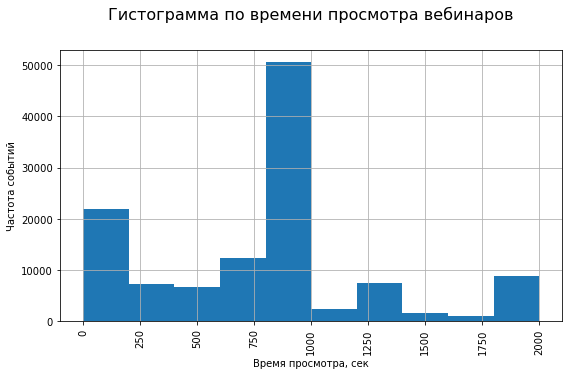

In [131]:
plt.figure(figsize=(9,5))
df_time_view['time_view_ev'].hist(range=(0,2000))
plt.xlabel('Время просмотра, сек')
plt.ylabel('Частота событий')
plt.title('Гистограмма по времени просмотра вебинаров', fontsize=16, pad=30)
plt.xticks(rotation = 90);

В основном участники слушают доклады по 15 мин.

Оставим только те посещения, где время просмотра мероприятия больше или равно половине продолжительности мероприятия по расписанию.

In [132]:
df_final= df_time_view.query('time_view_ev >= duration/2')

Так как у нас имеются пользователи, которые одновременно имели несколько сессий, то это увеличит время просмотра доклада, поэтому надо откорректировать это время. Напишем для этого функцию.

In [133]:
def time_view_upd(x):
    if x['time_view_ev'] > x['duration']:
        return x['duration']
    else:
        return x['time_view_ev']

df_final['time_view_ev'] = df_final.apply(time_view_upd, axis=1)    

In [134]:
df_final.shape

(115933, 14)

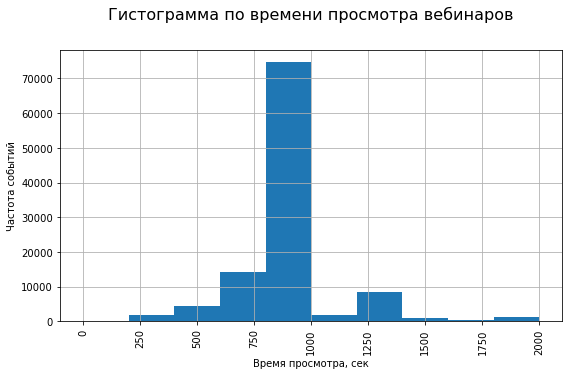

In [135]:
plt.figure(figsize=(9,5))
df_final['time_view_ev'].hist(range=(0,2000))
plt.xlabel('Время просмотра, сек')
plt.ylabel('Частота событий')
plt.title('Гистограмма по времени просмотра вебинаров', fontsize=16, pad=30)
plt.xticks(rotation = 90);

У нас автоматически отсеялись просмотры от 0 до 3 мин

In [136]:
# добавим поле с годом мероприятия
df_final['year'] = pd.DatetimeIndex(df_final['date']).year

In [137]:
df_final['event'].value_counts()

Мероприятие 12    78074
Мероприятие 11    36178
Мероприятие 5       821
Мероприятие 4       419
Мероприятие 2       202
Мероприятие 1       170
Мероприятие 6        47
Мероприятие 3        22
Name: event, dtype: int64

In [138]:
# добавим поле с временем просмотра в минутах
df_final['time_view_min'] = df_final['time_view_ev']/60

Создадим отдельный датафрейм для небольших мероприятий и для форумов.

In [139]:
events = df_final[df_final['event_type'] == 'small events']
forums = df_final[df_final['event_type'] == 'forum']

Предобработаем датафрейм с рубрикатором мероприятий.

In [140]:
rubricator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Год                 343 non-null    int64         
 1   Столбец2            343 non-null    datetime64[ns]
 2   Поток               343 non-null    object        
 3   Начало              343 non-null    object        
 4   Конец               327 non-null    object        
 5   Столбец1            342 non-null    object        
 6   Код классификатора  343 non-null    object        
 7   Столбец12           343 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 21.6+ KB


In [141]:
rubricator.head()

Год   Столбец2     Поток   Начало      Конец  Столбец1 Код классификатора  \
0  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Основное    
1  2022 2022-07-01  1 поток   10:00:00  12:00:00  Сессия 1          Нозологии   
2  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Основное    
3  2022 2022-07-01  1 поток   13:00:00  15:00:00  Сессия 2          Нозологии   
4  2022 2022-07-01  1 поток   15:30:00  17:25:00  Сессия 3          Основное    

       Столбец12  
0  Направление 1  
1  Направление 2  
2  Направление 3  
3  Направление 2  
4  Направление 4

In [142]:
rubricator.columns = ['year', 'date', 'potok', 'time_start', 'time_end', 'ses_title', 'code', 'course']

In [143]:
rubricator['potok'].value_counts()

3 поток     58
1 поток     57
4 поток     50
5 поток     50
2 поток     45
6 поток     28
8 поток     20
7 поток     18
10 поток    12
9 поток      5
Name: potok, dtype: int64

In [144]:
rubricator['potok'] = rubricator['potok'].apply(lambda x: x.split(' ')[0])

In [145]:
rubricator['potok'].value_counts()

3     58
1     57
4     50
5     50
2     45
6     28
8     20
7     18
10    12
9      5
Name: potok, dtype: int64

In [146]:
rubricator['potok'] = rubricator['potok'].astype(int)

In [147]:
rubricator['date_start_rubricator'] = pd.to_datetime(rubricator['date'] + pd.to_timedelta(rubricator['time_start'].astype(str)))
rubricator['date_end_rubricator'] = pd.to_datetime(rubricator['date'] + pd.to_timedelta(rubricator['time_end'].astype(str)))

In [148]:
rubricator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   343 non-null    int64         
 1   date                   343 non-null    datetime64[ns]
 2   potok                  343 non-null    int32         
 3   time_start             343 non-null    object        
 4   time_end               327 non-null    object        
 5   ses_title              342 non-null    object        
 6   code                   343 non-null    object        
 7   course                 343 non-null    object        
 8   date_start_rubricator  343 non-null    datetime64[ns]
 9   date_end_rubricator    327 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int32(1), int64(1), object(5)
memory usage: 25.6+ KB


In [149]:
rubricator.head()

year       date  potok time_start  time_end ses_title       code  \
0  2022 2022-07-01      1   10:00:00  12:00:00  Сессия 1  Основное    
1  2022 2022-07-01      1   10:00:00  12:00:00  Сессия 1  Нозологии   
2  2022 2022-07-01      1   13:00:00  15:00:00  Сессия 2  Основное    
3  2022 2022-07-01      1   13:00:00  15:00:00  Сессия 2  Нозологии   
4  2022 2022-07-01      1   15:30:00  17:25:00  Сессия 3  Основное    

          course date_start_rubricator date_end_rubricator  
0  Направление 1   2022-07-01 10:00:00 2022-07-01 12:00:00  
1  Направление 2   2022-07-01 10:00:00 2022-07-01 12:00:00  
2  Направление 3   2022-07-01 13:00:00 2022-07-01 15:00:00  
3  Направление 2   2022-07-01 13:00:00 2022-07-01 15:00:00  
4  Направление 4   2022-07-01 15:30:00 2022-07-01 17:25:00

In [150]:
df_final.shape

(115933, 16)

Объединим наш датасет с посещением и расписанием с рубрикатором.

In [151]:
forums_rubricator = df_final.merge(rubricator[['date', 'potok', 'ses_title', 'code', 'course', 'date_start_rubricator', 'date_end_rubricator']], on=['date', 'potok'])

In [152]:
forums_rubricator.shape

(498425, 21)

In [153]:
# отфильтруем по времени
forums_rubricator = forums_rubricator[((forums_rubricator['date_start'] >= forums_rubricator['date_start_rubricator']) & (forums_rubricator['date_start'] < forums_rubricator['date_end_rubricator'])) | 
                ((forums_rubricator['date_end'] > forums_rubricator['date_start_rubricator']) & (forums_rubricator['date_end'] <= forums_rubricator['date_end_rubricator'])) | 
                ((forums_rubricator['date_start'] <= forums_rubricator['date_start_rubricator']) & (forums_rubricator['date_end'] >= forums_rubricator['date_end_rubricator']))]

In [154]:
forums_rubricator.shape

(152689, 21)

In [155]:
forums_rubricator.head().T

0                           1   \
uid                                           160                         160   
city_user                         Санкт-Петербург             Санкт-Петербург   
profession                                   Врач                        Врач   
specialization                     Хирург онколог              Хирург онколог   
potok                                         1.0                         1.0   
date                          2022-07-01 00:00:00         2022-07-01 00:00:00   
title                                     Тема 54                     Тема 54   
speaker                Самборский Илья Филиппович  Самборский Илья Филиппович   
duration                                   1200.0                      1200.0   
date_start                    2022-07-01 10:00:00         2022-07-01 10:00:00   
date_end                      2022-07-01 10:20:00         2022-07-01 10:20:00   
event                              Мероприятие 11              Мероприятие 11   
event_type                                  forum                       forum   
time_view_ev                                665.0                       665.0   
year                                         2022                        2022   
time_view_min                           11.083333                   11.083333   
ses_title                                Сессия 1                    Сессия 1   
code                                    Основное                    Нозологии   
course                              Направление 1               Направление 2   
date_start_rubricator         2022-07-01 10:00:00         2022-07-01 10:00:00   
date_end_rubricator           2022-07-01 12:00:00         2022-07-01 12:00:00   

                                                 5   \
uid                                             160   
city_user                           Санкт-Петербург   
profession                                     Врач   
specialization                       Хирург онколог   
potok                                           1.0   
date                            2022-07-01 00:00:00   
title                                       Тема 56   
speaker                Шашина Марина Константиновна   
duration                                     1200.0   
date_start                      2022-07-01 10:25:00   
date_end                        2022-07-01 10:45:00   
event                                Мероприятие 11   
event_type                                    forum   
time_view_ev                                 1200.0   
year                                           2022   
time_view_min                                  20.0   
ses_title                                  Сессия 1   
code                                      Основное    
course                                Направление 1   
date_start_rubricator           2022-07-01 10:00:00   
date_end_rubricator             2022-07-01 12:00:00   

                                                 6   \
uid                                             160   
city_user                           Санкт-Петербург   
profession                                     Врач   
specialization                       Хирург онколог   
potok                                           1.0   
date                            2022-07-01 00:00:00   
title                                       Тема 56   
speaker                Шашина Марина Константиновна   
duration                                     1200.0   
date_start                      2022-07-01 10:25:00   
date_end                        2022-07-01 10:45:00   
event                                Мероприятие 11   
event_type                                    forum   
time_view_ev                                 1200.0   
year                                           2022   
time_view_min                                  20.0   
ses_title                                  Сессия 1   
code                                      Нозологии   
course  

In [156]:
forums_rubricator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152689 entries, 0 to 498396
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   uid                    152689 non-null  int32         
 1   city_user              152689 non-null  object        
 2   profession             152689 non-null  object        
 3   specialization         152689 non-null  object        
 4   potok                  152689 non-null  float64       
 5   date                   152689 non-null  datetime64[ns]
 6   title                  152689 non-null  object        
 7   speaker                152689 non-null  object        
 8   duration               152689 non-null  float64       
 9   date_start             152689 non-null  datetime64[ns]
 10  date_end               152689 non-null  datetime64[ns]
 11  event                  152689 non-null  object        
 12  event_type             152689 non-null  obje

Из-за двойной рубрикации (доклад может классифицироваться по двум кодам классификатора- основное и нозологии) у нас задвоились строки, но анализ мы будем проводим по количеству уникальных пользователей, поэтому задвоение не должно повлиять на результаты.

## Шаг 3. Анализ данных

Посмотрим на распределение количества участников по дням.

In [157]:
df_date = df_final.groupby('date', as_index=False)['uid'].nunique()
df_date.head()

date  uid
0 2022-03-13   22
1 2022-03-14   46
2 2022-07-01  798
3 2022-07-02  778
4 2022-07-03  705

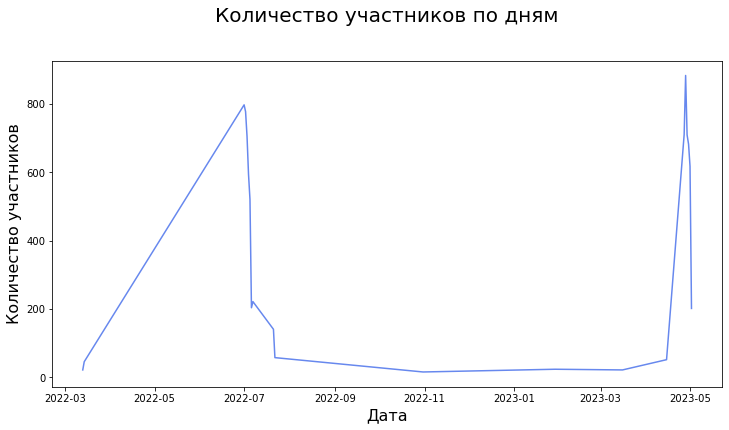

In [158]:
sns.set_palette('coolwarm')
plt.figure(figsize=(12,6))
plt.title('Количество участников по дням', y=1.1, fontsize=20)
plt.ylabel('Количество участников', fontsize=16)
plt.xlabel('Дата', fontsize=16)
sns.lineplot(x='date', y='uid', data=df_date);

Мы видим, что больше всего участников посещает большие форумы.

Посмотрим на среднее время просмотра на 1 пользователя в динамике.

In [159]:
df_final.head(10).T

0                             1   \
uid                                    160                           160   
city_user                  Санкт-Петербург               Санкт-Петербург   
profession                            Врач                          Врач   
specialization              Хирург онколог                Хирург онколог   
potok                                  1.0                           1.0   
date                   2022-07-01 00:00:00           2022-07-01 00:00:00   
title                              Тема 54                       Тема 56   
speaker         Самборский Илья Филиппович  Шашина Марина Константиновна   
duration                            1200.0                        1200.0   
date_start             2022-07-01 10:00:00           2022-07-01 10:25:00   
date_end               2022-07-01 10:20:00           2022-07-01 10:45:00   
event                       Мероприятие 11                Мероприятие 11   
event_type                           forum                         forum   
time_view_ev                         665.0                        1200.0   
year                                  2022                          2022   
time_view_min                    11.083333                          20.0   

                                             2                            4   \
uid                                         160                          160   
city_user                       Санкт-Петербург              Санкт-Петербург   
profession                                 Врач                         Врач   
specialization                   Хирург онколог               Хирург онколог   
potok                                       1.0                          1.0   
date                        2022-07-01 00:00:00          2022-07-01 00:00:00   
title                                   Тема 57                      Тема 61   
speaker         Кабылбекова Ангелина Руслановна  Уродкова Эльмира Руслановна   
duration                                 1200.0                        900.0   
date_start                  2022-07-01 10:50:00          2022-07-01 13:00:00   
date_end                    2022-07-01 11:10:00          2022-07-01 13:15:00   
event                            Мероприятие 11               Мероприятие 11   
event_type                                forum                        forum   
time_view_ev                             1080.0                        900.0   
year                                       2022                         2022   
time_view_min                              18.0                         15.0   

                                      5                          6   \
uid                                  160                        160   
city_user                Санкт-Петербург            Санкт-Петербург   
profession                          Врач                       Врач   
specialization            Хирург онколог             Хирург онколог   
potok                                1.0                        1.0   
date                 2022-07-01 00:00:00        2022-07-01 00:00:00   
title                            Тема 62                    Тема 63   
speaker         Подборнов Юрий Вадимович  Милешкина Жанна Артемовна   
duration                           900.0                      900.0   
date_start           2022-07-01 13:20:00        2022-07-01 13:40:00   
date_end             2022-07-01 13:35:00        2022-07-01 13:55:00   
event                     Мероприятие 11             Мероприятие 11   
event_type                         forum                      forum   
time_view_ev                       900.0                      722.0   
year                                2022                       2022   
time_view_min                       15.0                  12.033333   

                                          7                            12  \
uid                                      160                          160   
city_user               

In [160]:
df_avg_view = (df_final.groupby(['date', 'uid'], as_index=False).agg({'time_view_min':'mean'})).groupby('date', as_index=False).agg({'time_view_min':'mean'})
df_avg_view['date'] = df_avg_view['date'].dt.date
df_avg_view['time_view_min'] = round(df_avg_view['time_view_min'],0)
df_avg_view.head()

date  time_view_min
0  2022-03-13           44.0
1  2022-03-14           27.0
2  2022-07-01           18.0
3  2022-07-02           17.0
4  2022-07-03           24.0

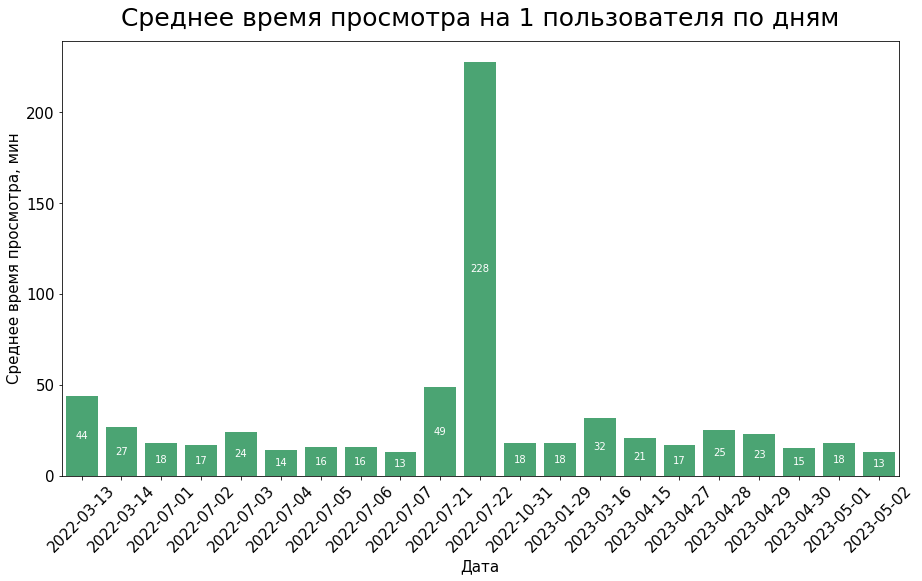

In [161]:
plt.figure(figsize=(15,8))
sns.set_palette('coolwarm')
bar = sns.barplot(x='date', y='time_view_min', data=df_avg_view,  color='mediumseagreen')
bar.bar_label(bar.containers[0], label_type='center', color='white')
bar.set_title('Среднее время просмотра на 1 пользователя по дням', fontdict={'fontsize': 25}, pad=15)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Среднее время просмотра, мин', fontsize=15)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=15);

Посмотрим на количество участников по мероприятиям.

In [162]:
df_ev = df_final.groupby('event', as_index=False)['uid'].nunique().sort_values(by='uid', ascending=False)
df_ev

event   uid
2  Мероприятие 12  1611
1  Мероприятие 11  1379
6   Мероприятие 5   146
0   Мероприятие 1    59
5   Мероприятие 4    52
3   Мероприятие 2    24
4   Мероприятие 3    22
7   Мероприятие 6    16

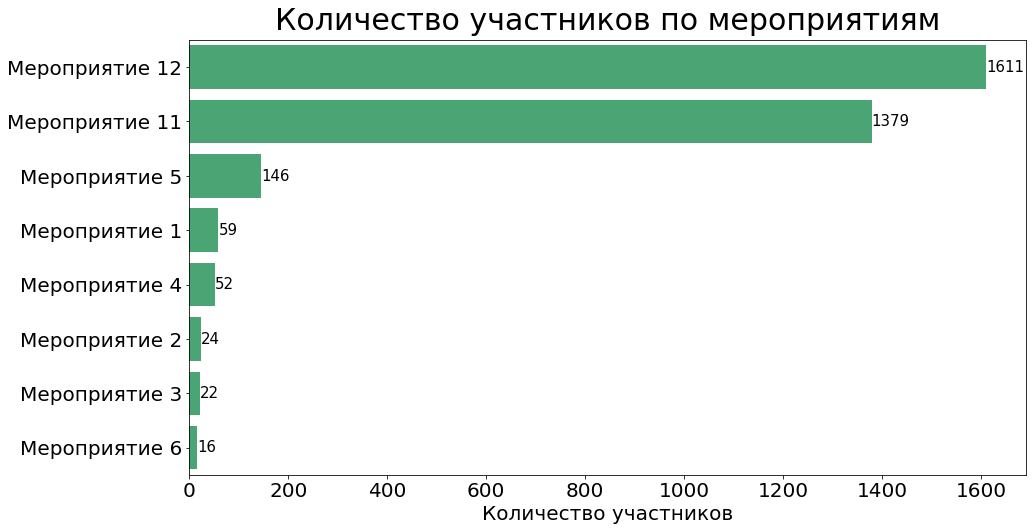

In [163]:
plt.figure(figsize=(15,8))
sns.set_palette('coolwarm')
bar = sns.barplot(x='uid', y='event', data=df_ev, color='mediumseagreen')
bar.bar_label(bar.containers[0], size=15)
bar.set_title('Количество участников по мероприятиям', fontdict={'fontsize': 30}, pad=10)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20);

Посмотрим на популярные выступления  и спикеров на форумах.

In [164]:
df_title = forums.groupby('title', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
df_title

title  uid
0   Тема 726  711
1   Тема 725  709
2   Тема 724  704
3   Тема 723  700
4   Тема 722  694
5   Тема 721  682
6   Тема 710  613
7   Тема 709  590
8   Тема 708  565
9   Тема 753  554
10  Тема 752  546
11  Тема 751  543
12  Тема 750  537
13  Тема 707  529
14  Тема 769  525

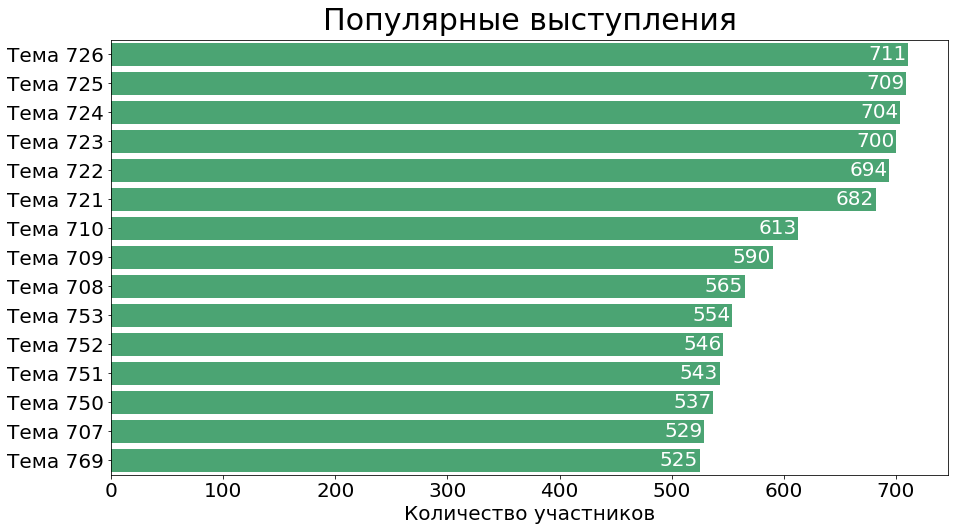

In [165]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='title', x='uid', data=df_title, color='mediumseagreen')
bar.bar_label(bar.containers[0], label_type='edge', size=20,  padding=-40, color='white')
bar.set_title('Популярные выступления', fontdict={'fontsize':30}, pad=10)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20);

In [166]:
df_speaker = forums.groupby('speaker', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
list_speakers = df_speaker['speaker']
df_speaker

speaker  uid
0       Тезиков Радик Ярославович  939
1      Кривулин Альберт Дамирович  915
2        Подборнов Юрий Вадимович  875
3       Милешкина Жанна Артемовна  855
4      Бажанкин Никита Алексеевич  836
5      Бутогина Ксения Робертовна  779
6    Гордон Константин Алексеевич  777
7       Горьковых Егор Филиппович  754
8   Мусеева Александра Викторовна  724
9      Сущинский Руслан Радикович  714
10      Тиманина Тамара Сергеевна  709
11        Балугян Герман Петрович  704
12    Пелымцев Геннадий Никитович  702
13      Кожеедов Виктор Романович  700
14    Иловайский Кирилл Данилович  682

In [167]:
# посмотрим сколько было выступлений у этих спикеров 
df_speaker_cnt = forums.query('speaker in @list_speakers').groupby('speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).reset_index(drop=True)
df_speaker_cnt

speaker  title
0       Тезиков Радик Ярославович     22
1        Подборнов Юрий Вадимович     16
2     Пелымцев Геннадий Никитович     14
3       Горьковых Егор Филиппович     13
4      Бутогина Ксения Робертовна     11
5      Сущинский Руслан Радикович     11
6    Гордон Константин Алексеевич     10
7       Милешкина Жанна Артемовна      8
8   Мусеева Александра Викторовна      5
9      Бажанкин Никита Алексеевич      4
10     Кривулин Альберт Дамирович      2
11        Балугян Герман Петрович      1
12    Иловайский Кирилл Данилович      1
13      Кожеедов Виктор Романович      1
14      Тиманина Тамара Сергеевна      1

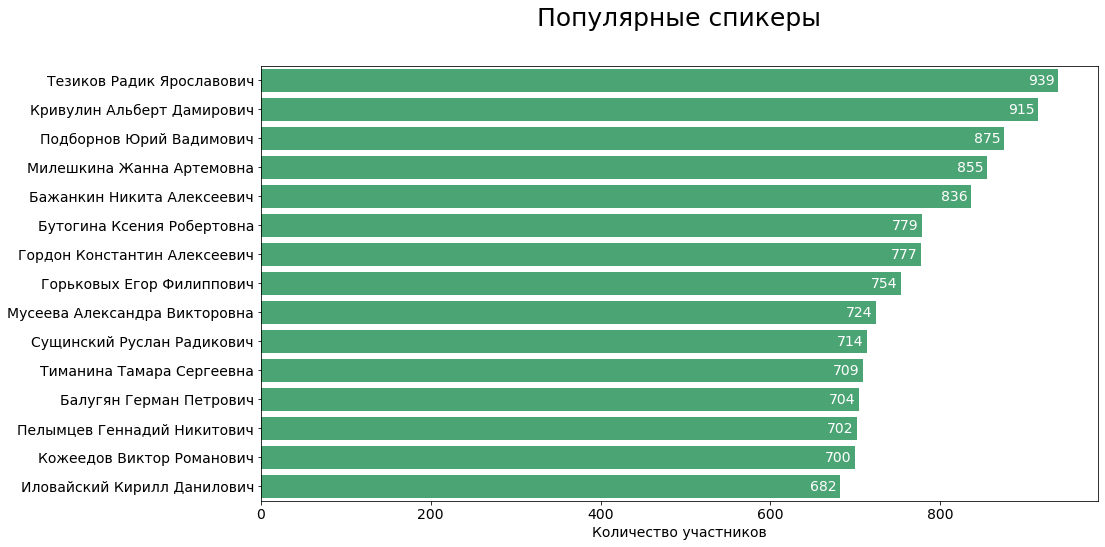

In [168]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='speaker', x='uid', data=df_speaker, color='mediumseagreen')
bar.bar_label(bar.containers[0], label_type='edge', size=14,  padding=-30, color='white')
bar.set_title('Популярные спикеры', fontdict={'fontsize':25}, pad=40)
plt.xlabel('Количество участников', fontsize=14);
bar.set(ylabel=None)
plt.tick_params(axis='both', which='major', labelsize=14);

Проанализируем небольшие мероприятия по докладам и спикерам.

In [169]:
ev_title = events.groupby('title', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
ev_title

title  uid
0   Тема 48  106
1   Тема 47  104
2    Тема 7  103
3   Тема 49   99
4   Тема 50   98
5   Тема 51   93
6   Тема 53   87
7   Тема 52   86
8   Тема 22   36
9    Тема 2   32
10  Тема 20   32
11   Тема 3   32
12  Тема 23   32
13  Тема 27   31
14  Тема 24   31

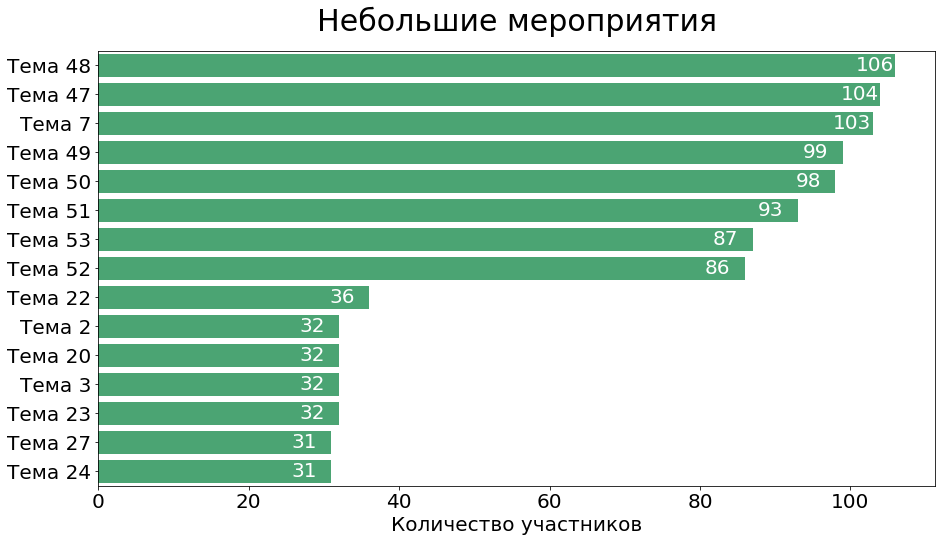

In [170]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='title', x='uid', data=ev_title, color='mediumseagreen')
bar.bar_label(bar.containers[0], label_type='edge', size=20,  padding=-40, color='white')
bar.set_title('Небольшие мероприятия', fontdict={'fontsize':30}, pad=20)
plt.xlabel('Количество участников', fontsize=20);
bar.set(ylabel=None)
plt.tick_params(axis='both', which='major', labelsize=20);

In [171]:
ev_speaker = events.groupby('speaker', as_index=False).agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False).reset_index(drop=True).head(15)
list_ev_speakers = ev_speaker['speaker']
ev_speaker

speaker  uid
0           Джин Геннадий Степанович  134
1    Влодзимирская Наталья Тимуровна  106
2          Боглаева Татьяна Глебовна  104
3      Бабочкина Елизавета Сергеевна   99
4          Самедов Валерий Дамирович   93
5            Монина Галина Андреевна   87
6       Растегаев Роман Валентинович   86
7              Ямаева Анна Даниловна   45
8      Закржевский Ильдар Дмитриевич   39
9        Клепова Маргарита Яковлевна   38
10        Федяева Наталья Эдуардовна   36
11  Михальчишина Эльвира Ярославовна   32
12         Полилов Анатолий Павлович   32
13      Дубровкин Александр Олегович   31
14   Алексикова Валентина Васильевна   31

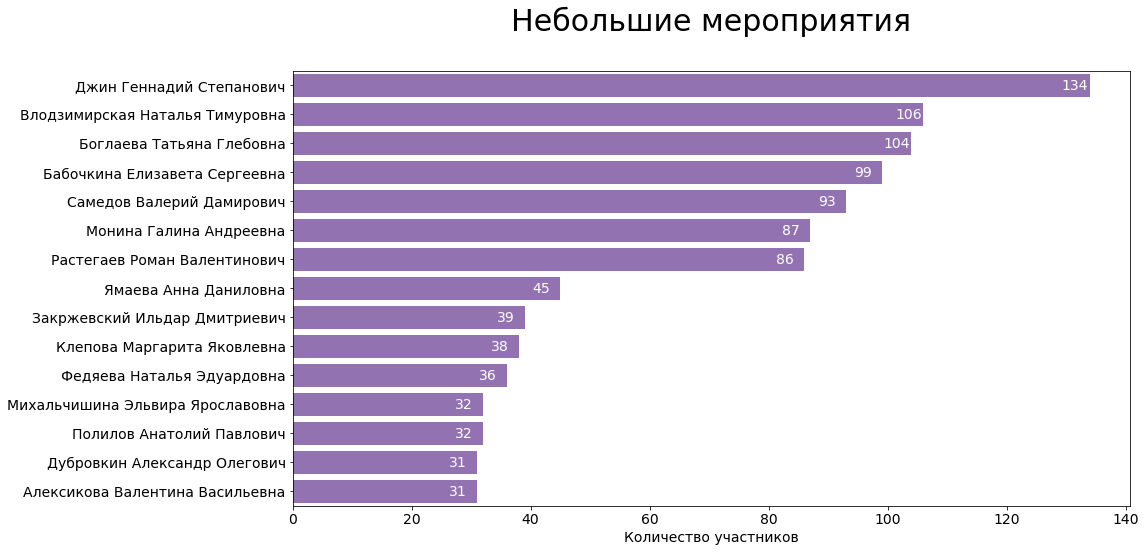

In [172]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='speaker', x='uid', data=ev_speaker, color = 'tab:purple')
bar.bar_label(bar.containers[0], label_type='edge', size=14,  padding=-28, color='white')
bar.set_title('Небольшие мероприятия', fontdict={'fontsize':30}, pad=40)
plt.xlabel('Количество участников', fontsize=14);
bar.set(ylabel=None)
plt.tick_params(axis='both', which='major', labelsize=14);

In [173]:
ev_speaker_cnt = events.query('speaker in @list_ev_speakers').groupby('speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).reset_index(drop=True)
ev_speaker_cnt

speaker  title
0      Закржевский Ильдар Дмитриевич      3
1           Джин Геннадий Степанович      2
2        Клепова Маргарита Яковлевна      2
3              Ямаева Анна Даниловна      2
4    Алексикова Валентина Васильевна      1
5      Бабочкина Елизавета Сергеевна      1
6          Боглаева Татьяна Глебовна      1
7    Влодзимирская Наталья Тимуровна      1
8       Дубровкин Александр Олегович      1
9   Михальчишина Эльвира Ярославовна      1
10           Монина Галина Андреевна      1
11         Полилов Анатолий Павлович      1
12      Растегаев Роман Валентинович      1
13         Самедов Валерий Дамирович      1
14        Федяева Наталья Эдуардовна      1

Посмотрим на популярные выступления и спикеров по годам.

In [174]:
df_title_22 = forums[forums['year'] == 2022].groupby('title', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_title_23 = forums[forums['year'] == 2023].groupby('title', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_speaker_22 = forums[forums['year'] == 2022].groupby('speaker', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_speaker_23 = forums[forums['year'] == 2023].groupby('speaker', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)

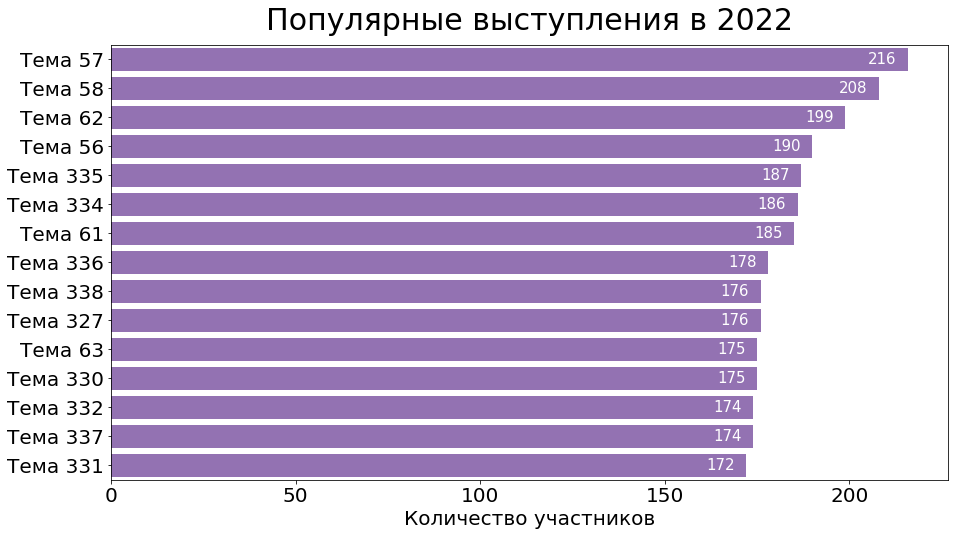

In [175]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='title', x='uid', data=df_title_22, color = 'tab:purple')
bar.bar_label(bar.containers[0], label_type='edge', size=15,  padding=-40, color='white')
bar.set_title('Популярные выступления в 2022', fontdict={'fontsize':30}, pad=15)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20);

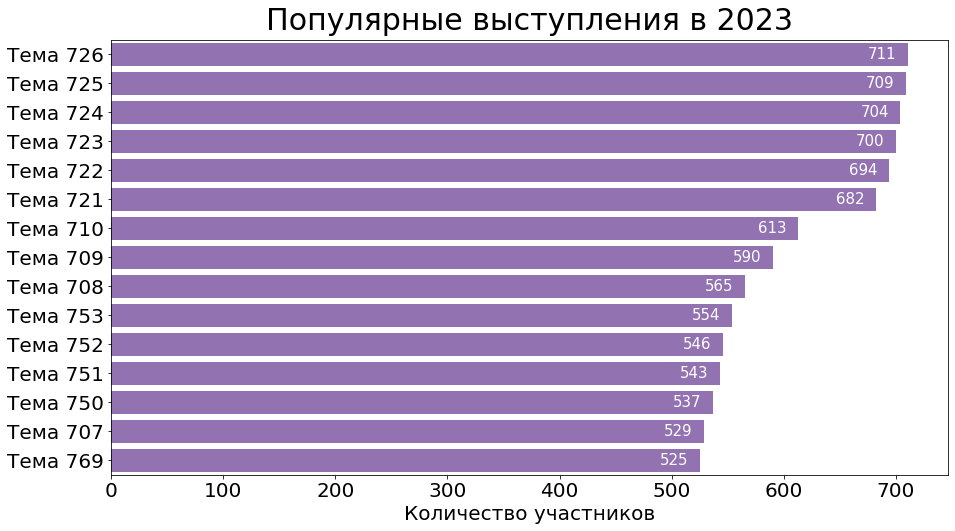

In [176]:
# строим график
plt.figure(figsize=(15, 8))
bar = sns.barplot( y='title', x='uid', data=df_title_23, color = 'tab:purple')
bar.bar_label(bar.containers[0], label_type='edge', size=15,  padding=-40, color='white')
bar.set_title('Популярные выступления в 2023', fontdict={'fontsize':30}, pad=10)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20);

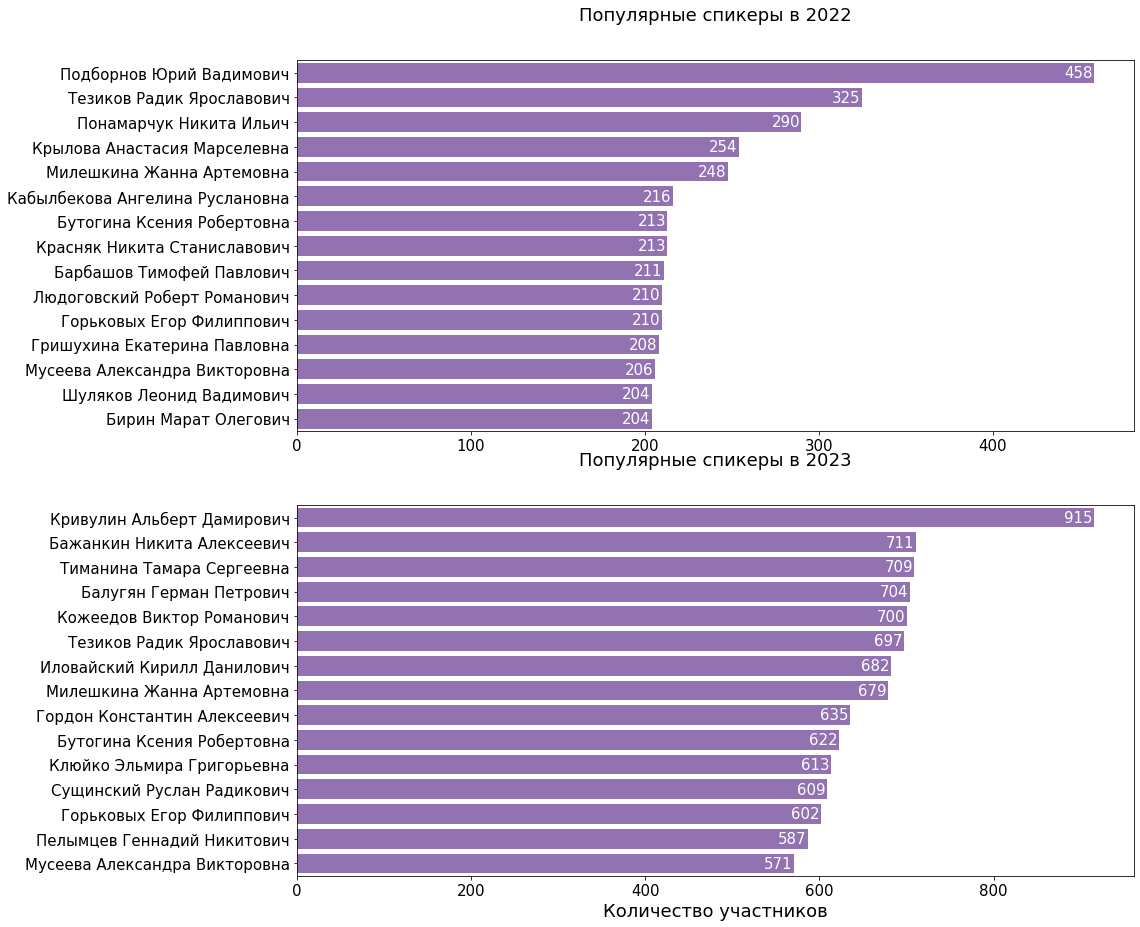

In [177]:
# строим график
fig, axes = plt.subplots(2, 1,figsize=(15, 15))
sns.barplot( y='speaker', x='uid', data=df_speaker_22, ax=axes[0], color = 'tab:purple')
axes[0].bar_label(axes[0].containers[0], label_type='edge', size=15,  padding=-30, color='white')
axes[0].set_title('Популярные спикеры в 2022', fontdict={'fontsize':18}, pad=40)
axes[0].set(ylabel=None)
axes[0].set(xlabel=None)
#plt.xlabel('Количество участников', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=15)
sns.barplot( y='speaker', x='uid', data=df_speaker_23, ax=axes[1], color = 'tab:purple')
axes[1].bar_label(axes[1].containers[0], label_type='edge', size=15,  padding=-30, color='white')
axes[1].set_title('Популярные спикеры в 2023', fontdict={'fontsize':18}, pad=40)
axes[1].set(ylabel=None)
plt.xlabel('Количество участников', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=15);

In [178]:
# посмотрим на количество участников по годам
df_year = df_final.groupby('year', as_index=False).agg({'uid':'nunique'})

In [179]:
df_year

year   uid
0  2022  1536
1  2023  1688

In [180]:
fig = go.Figure(
    data=[go.Pie(labels=df_year['year'],
                 values=df_year['uid'],
                 )
         ]
)
fig.update_layout(
    title={
        'text': 'Число участников по годам',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title='Год',
    font=dict(
        family="Times New Roman",
        size=15,
        color="RebeccaPurple"
    )
)
fig.show();

Посмотрим на популярные направления в рамках форумов.

In [181]:
df_course = forums_rubricator.groupby('course', as_index=False).agg({'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15)
df_course

course   uid
0    Направление 1  1578
22   Направление 3  1458
33   Направление 7  1424
11   Направление 2  1248
30   Направление 4   838
7   Направление 16   753
5   Направление 14   576
4   Направление 13   568
35   Направление 9   526
27  Направление 34   516
2   Направление 11   486
14  Направление 22   473
32   Направление 6   443
28  Направление 35   435
1   Направление 10   430

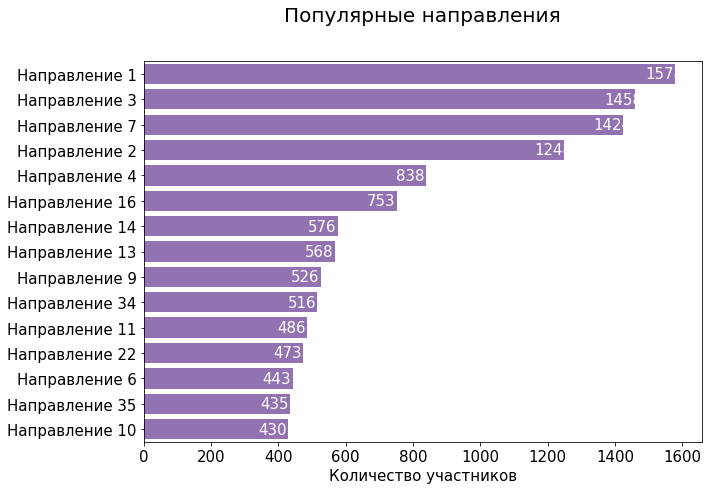

In [182]:
plt.figure(figsize=(10, 7))
bar = sns.barplot(y='course', x='uid', data=df_course, color = 'tab:purple')
bar.bar_label(bar.containers[0], label_type='edge', size=15,  padding=-30, color='white')
bar.set_title('Популярные направления', fontdict={'fontsize':20}, pad=40)
bar.set(ylabel=None)
plt.xlabel('Количество участников', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15);

## Шаг 4. Проектирование дашборда

In [183]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

line_fig = px.line(df_date, x = 'date', y = 'uid', title = 'Количество участников по дням (все мероприятия)',
             labels={
                 "uid": "Количество участников",
                 "date": "Дата"
             })
line_fig.update_xaxes(rangeslider_visible=True)


fig_avg = px.bar(df_avg_view, x = 'date', y = 'time_view_min', title = 'Среднее время просмотра на 1 пользователя по дням',
     labels={
         "time_view_min": "Среднее время просмотра, мин",
         "date": "Дата",
     },
     text='time_view_min'
    )
fig_avg.update_layout(
    title='Среднее время просмотра на 1 пользователя по дням',
    xaxis=dict(
        title='Дата',
        titlefont_size=12,
        tickfont_size=12,
    ),
    yaxis=dict(
        title='Среднее время просмотра, мин',
        titlefont_size=12,
        tickfont_size=12,
    ))
# выделим список дат, в которые не было мероприятий, чтобы исключить их на графике для увеличения масштаба визуализации
date_list_all = pd.date_range(df_avg_view['date'].min(),df_avg_view['date'].max(),freq='d')
date_list = list(df_avg_view['date'])
dt_breaks = [x for x in date_list_all if x not in date_list]
fig_avg.update_xaxes(
    rangebreaks=[dict(values=dt_breaks)] # hide dates with no values
)

app.layout = html.Div([
    html.H1(children = 'Анализ трансляций НМИЦ онкологии'),
    
    dcc.Markdown ('''
        НМИЦ онкологии – многопрофильное клиническое, научное и учебное учреждение в области онкологии. 
        Основные направления работы центра:
        * Научно-исследовательская деятельность 
        * Лечебно-диагностическая деятельность
        * Образовательная деятельность
        * Научно-издательская деятельность 
        * Общественная деятельность
        * Просветительская деятельность

        Данный дашборд позволяет определить наиболее интересные темы вебинаров, посвященных новым технологиям и методам в сфере лечения онкологии, и популярных спикеров
        в НМИЦ онкологии.
        ''',
        link_target="_blank",
        style={
        'textAlign': 'left',
        'color': '#141E46'
    } ),
    html.Div(
        dcc.Graph(
            figure = go.Figure(go.Indicator(
            mode = "number",
            value = df_final['uid'].nunique(),
            title = {'text': "Всего участников"})),      
            id = 'ind_1'
            ), 
        style={'width': '23%', 'display': 'inline-block'}
    ),
    html.Div(
        dcc.Graph(
            figure = go.Figure(go.Indicator(
            mode = "number",
            value = df_final['event'].nunique(),
            title = {'text': "Всего мероприятий"})),    
            id = 'ind_2'
            ), 
        style={'width': '23%', 'display': 'inline-block'}
    ),
    html.Div(
        dcc.Graph(
            figure = go.Figure(go.Indicator(
            mode = "number",
            value = df_final['speaker'].nunique(),
            title = {'text': "Всего спикеров"})),   
            id = 'ind_3'
            ), 
        style={'width': '23%', 'display': 'inline-block'}
    ),
    html.Div(
        dcc.Graph(
            figure = go.Figure(go.Indicator(
            mode = "number",
            value = df_final['title'].nunique(),
            title = {'text': "Всего докладов"})),     
            id = 'ind_4'
            ),
        style={'width': '23%', 'display': 'inline-block'}
    ),
    html.Div(
        dcc.Graph(
            figure = line_fig,
            id='line_id_day'
        ),
         style={'width': '49%', 'display': 'inline-block'}
    ),
    html.Div(
        dcc.Graph(
            figure = fig_avg,      
            id = 'avg_bar_id'
        ),
        style={'width': '49%', 'display': 'inline-block'}
    ),
    dcc.Tabs(id='tabs', value='tab-1', children=[
        dcc.Tab(label='Форумы', value='tab-1'),
        dcc.Tab(label='Небольшие мероприятия', value='tab-2'),
    ]),
 
    html.Div(id='tabs-content')
])

@app.callback(
    Output('tabs-content', 'children'),
    Input('tabs', 'value')
)
def render_content(tab):
    if tab == 'tab-1':
        return html.Div([

        html.Label('Временной период:'),

        dcc.DatePickerRange(
            min_date_allowed=df_final['date'].min(),
            max_date_allowed=df_final['date'].max(),
            initial_visible_month=df_final['date'].min(),
            start_date=df_final['date'].min(),
            end_date=df_final['date'].max(),
            id='dt_selector',
        ), 
        html.Br(),
        html.Br(),

        dcc.Dropdown(
        id="events-dropdown",
        options=forums['event'].unique(),
        value=forums['event'].unique(),
        clearable=True,
        multi=True
        ), 
            
        html.Br(),
            
        # графики
        dcc.Graph(
            figure = {},      
            id = 'line_id'
            ),
            
        dcc.Graph(
            figure = {},      
            id = 'bar_id'
            ),
            
        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar1_id'
            ), 
        style={'width': '59%', 'display': 'inline-block'}
        ),
            
        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar2_id'
            ), 
        style={'width': '39%', 'display': 'inline-block'}
        ),
        
        dcc.Graph(
                figure = {},      
                id = 'bar3_id'
            ),   
        dcc.Graph(
                figure = {},      
                id = 'bar4_id'
            ), 
    ])
    elif tab == 'tab-2':
         return html.Div([

        html.Label('Временной период:'),

        dcc.DatePickerRange(
            min_date_allowed=events['date'].min(),
            max_date_allowed=events['date'].max(),
            initial_visible_month=events['date'].min(),
            start_date=events['date'].min(),
            end_date=events['date'].max(),
            id='dt_selector_2',
        ), 
        html.Br(),
        html.Br(),

        dcc.Dropdown(
            id='events-dropdown_2',
            options=events['event'].unique(),
            value=events['event'].unique(),
            clearable=True,
            multi=True
        ),   
             
        # графики 
        dcc.Graph(
            figure = {},      
            id = 'line_id_2'
            ),
             
        dcc.Graph(
            figure = {},      
            id = 'bar_id_2'
            ),  

        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar1_id_2'
            ), 
        style={'width': '59%', 'display': 'inline-block'}
        ),
            
        html.Div(   
        dcc.Graph(
                figure = {},      
                id = 'bar2_id_2'
            ), 
        style={'width': '39%', 'display': 'inline-block'}
        ),

        dcc.Graph(
        figure = {},      
        id = 'bar3_id_2'
        )
    ])
@app.callback(
    [Output('bar_id', 'figure'),  
     Output('bar1_id', 'figure'),
     Output('bar2_id', 'figure'),
     Output('bar3_id', 'figure'),
     Output('bar4_id', 'figure'),
     Output('line_id', 'figure'),
    ],
    [Input('dt_selector', 'start_date'),
     Input('dt_selector', 'end_date'),
     Input('events-dropdown', 'value'),
    ])

def update_figures(start_date, end_date, event):
   
    dt_breaks_for=[]
    # применяем фильтрацию
    df_day = forums.query('date >= @start_date and date <= @end_date and event in @event').groupby('date', as_index=False)['uid'].nunique()
    df_title = forums.query('date >= @start_date and date <= @end_date and event in @event').groupby('title', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    df_speaker = forums.query('date >= @start_date and date <= @end_date and event in @event').groupby('speaker', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    speakers = df_speaker['speaker']
    df_speaker_cnt = forums.query('date >= @start_date and date <= @end_date and event in @event and speaker in @speakers').groupby(
        'speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).sort_values(by='title', ascending=True)
    df_course = forums_rubricator.query('date >= @start_date and date <= @end_date and event in @event').groupby('course', as_index=False).agg(
        {'uid':'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    df_event = forums.query('date >= @start_date and date <= @end_date and event in @event').groupby(
        'event', as_index=False)['uid'].nunique().sort_values(by='uid', ascending=True)
  
    if not df_day.empty:
        date_list_all_for = pd.date_range(df_day['date'].min(),df_day['date'].max(),freq='d') 
        date_list_for = list(df_day['date'])
        dt_breaks_for = [x for x in date_list_all_for if x not in date_list_for]

    fig = px.bar(df_title, x = 'uid', y = 'title', title = 'Топ-15 выступлений',
                 labels={
                     "uid": "Количество участников",
                     "title": "Выступление"
                 },
                 text='uid'
                )
    fig.update_layout(
        title='Топ-15 выступлений',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )

    fig1 = px.bar(df_speaker, x = 'uid', y = 'speaker', title = 'Топ-15 спикеров',
                  labels={
                      "uid": "Количество участников",
                      "speaker": "Ведущий"
                  },
                  text='uid')
    fig1.update_layout(
        title='Топ-15 спикеров',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    
    fig2 = px.bar(df_speaker_cnt, x = 'title', y = 'speaker', title = 'Топ-15 направлений',
              labels={
                 "title": "Количество выступлений",
                  "speaker": "Спикер"
              },
              text='title',
             )
    fig2.update_layout(
        title='Количество докладов у топ-спикеров',
        xaxis=dict(
            title='Количество докладов',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    
    fig3 = px.bar(df_course, x = 'uid', y = 'course', title = 'Топ-15 направлений',
                  labels={
                     "uid": "Количество участников",
                      "course": "Направление"
                  },
                  text='uid',
                 )
    fig3.update_layout(
        title='Топ-15 направлений',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    fig4 = go.Figure(data=go.Pie(labels=df_event['event'],
                 values=df_event['uid'])
                    )
    fig4.update_layout(
    title={
        'text': 'Число участников по форумам',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title='Мероприятие',
    font=dict(
        family="Times New Roman",
        size=15,
        color="RebeccaPurple")
    )
    
    fig5 = px.bar(df_day, x = 'date', y = 'uid', title = 'Количество участников по дням',
         labels={
             "uid": "Количество участников",
             "date": "Дата"
         },
         text='uid'
        )
    fig5.update_layout(
        title='Количество участников по дням',
        xaxis=dict(
            title='Дата',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
    )
    fig5.update_xaxes(
       rangebreaks=[dict(values=dt_breaks_for)] # hide dates with no values
    )
    
    return fig, fig1, fig2, fig3, fig4, fig5

@app.callback(
    [Output('bar_id_2', 'figure'), 
     Output('bar1_id_2', 'figure'),
     Output('bar2_id_2', 'figure'),
     Output('bar3_id_2', 'figure'),
     Output('line_id_2', 'figure'),
    ],
    [Input('dt_selector_2', 'start_date'),
     Input('dt_selector_2', 'end_date'), 
     Input('events-dropdown_2', 'value'),
    ])

def update_figures_2(start_date, end_date, event):
    
    dt_breaks_for=[]
    # применяем фильтрацию
    df_day = events.query('date >= @start_date and date <= @end_date and event in @event').groupby('date', as_index=False)['uid'].nunique()
    df_title = events.query('date >= @start_date and date <= @end_date and event in @event').groupby('title', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    df_speaker = events.query('date >= @start_date and date <= @end_date and event in @event').groupby('speaker', as_index=False).agg(
        {'uid': 'nunique'}).sort_values(by='uid', ascending=False).head(15).sort_values(by='uid', ascending=True)
    speakers = df_speaker['speaker']
    df_speaker_cnt = events.query('date >= @start_date and date <= @end_date and event in @event and speaker in @speakers').groupby(
        'speaker', as_index=False).agg({'title': 'nunique'}).sort_values(by='title', ascending=False).head(15).sort_values(by='title', ascending=True)
    df_event = events.query('date >= @start_date and date <= @end_date and event in @event').groupby('event', as_index=False).agg(
     {'uid': 'nunique'}).sort_values(by='uid', ascending=True)

    if not df_day.empty:
        date_list_all_for = pd.date_range(df_day['date'].min(),df_day['date'].max(),freq='d') 
        date_list_for = list(df_day['date'])
        dt_breaks_for = [x for x in date_list_all_for if x not in date_list_for]
    
    fig = px.bar(df_title, x = 'uid', y = 'title', title = 'Топ-15 выступлений',
                 labels={
                     "uid": "Количество участников",
                     "title": "Выступление"
                 },
                 text='uid'
                )
    fig.update_layout(
        title='Топ-15 выступлений',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )

    fig1 = px.bar(df_speaker, x = 'uid', y = 'speaker', title = 'Топ-15 спикеров',
                  labels={
                      "uid": "Количество участников",
                      "speaker": "Ведущий"
                  },
                  text='uid')
    fig1.update_layout(
        title='Топ-15 спикеров',
        xaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis_title=None,
    )
    fig2 = px.bar(df_speaker_cnt, x = 'title', y = 'speaker', title = 'Рейтинг мероприятий',
       labels={
           "title": "Количество выступлений",
           "speaker": "Спикер"
       },
       text='title')
    fig2.update_layout(
         title='Количество докладов у топ-спикеров',
         xaxis=dict(
             title='Количество докладов',
             titlefont_size=12,
             tickfont_size=12,
            ),
            yaxis_title=None,
            )
    fig3 = px.bar(df_event, x = 'uid', y = 'event', title = 'Рейтинг мероприятий',
           labels={
               "uid": "Количество участников",
               "event": "Мероприятие"
           },
           text='uid')
    fig3.update_layout(
         title='Рейтинг мероприятий',
         xaxis=dict(
             title='Количество участников',
             titlefont_size=12,
             tickfont_size=12,
            ),
            yaxis_title=None,
            )
    fig4 = px.bar(df_day, x = 'date', y = 'uid', title = 'Количество участников по дням',
         labels={
             "uid": "Количество участников",
             "date": "Дата"
         },
         text='uid'
    )
    fig4.update_layout(
        title='Количество участников по дням',
        xaxis=dict(
            title='Дата',
            titlefont_size=12,
            tickfont_size=12,
        ),
        yaxis=dict(
            title='Количество участников',
            titlefont_size=12,
            tickfont_size=12,
        ),
    )
    fig4.update_xaxes(
        rangebreaks=[dict(values=dt_breaks_for)] # hide dates with no values
    )
    return fig, fig1, fig2, fig3, fig4

app.run(jupyter_mode="external")

Dash app running on http://127.0.0.1:8050/


## Шаг 5. Сегментация участников на основе просмотра мероприятий

In [184]:
forums_rubricator.head()

uid        city_user profession  specialization  potok       date  \
0   160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01   
1   160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01   
5   160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01   
6   160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01   
10  160  Санкт-Петербург       Врач  Хирург онколог    1.0 2022-07-01   

      title                          speaker  duration          date_start  \
0   Тема 54       Самборский Илья Филиппович    1200.0 2022-07-01 10:00:00   
1   Тема 54       Самборский Илья Филиппович    1200.0 2022-07-01 10:00:00   
5   Тема 56     Шашина Марина Константиновна    1200.0 2022-07-01 10:25:00   
6   Тема 56     Шашина Марина Константиновна    1200.0 2022-07-01 10:25:00   
10  Тема 57  Кабылбекова Ангелина Руслановна    1200.0 2022-07-01 10:50:00   

              date_end           event event_type  time_view_ev  year  \
0  2022-07-01 10:20:00  Мероприятие 11      forum         665.0  2022   
1  2022-07-01 10:20:00  Мероприятие 11      forum         665.0  2022   
5  2022-07-01 10:45:00  Мероприятие 11      forum        1200.0  2022   
6  2022-07-01 10:45:00  Мероприятие 11      forum        1200.0  2022   
10 2022-07-01 11:10:00  Мероприятие 11      forum        1080.0  2022   

    time_view_min ses_title       code         course date_start_rubricator  \
0       11.083333  Сессия 1  Основное   Направление 1   2022-07-01 10:00:00   
1       11.083333  Сессия 1  Нозологии  Направление 2   2022-07-01 10:00:00   
5       20.000000  Сессия 1  Основное   Направление 1   2022-07-01 10:00:00   
6       20.000000  Сессия 1  Нозологии  Направление 2   2022-07-01 10:00:00   
10      18.000000  Сессия 1  Основное   Направление 1   2022-07-01 10:00:00   

   date_end_rubricator  
0  2022-07-01 12:00:00  
1  2022-07-01 12:00:00  
5  2022-07-01 12:00:00  
6  2022-07-01 12:00:00  
10 2022-07-01 12:00:00

Посчитаем сколько выступлений прослушали пользователи по направлениям.

In [185]:
forums_course = forums_rubricator.groupby(['uid', 'course'], as_index=False)['title'].count()
forums_course.columns = ['uid', 'course', 'course_cnt']
forums_course

uid          course  course_cnt
0        160   Направление 1          31
1        160  Направление 13           8
2        160  Направление 14           6
3        160   Направление 2          51
4        160   Направление 3          35
...      ...             ...         ...
15747  22637   Направление 7           1
15748  22637   Направление 8           1
15749  22646   Направление 3           3
15750  22657   Направление 4           4
15751  22659   Направление 4           1

[15752 rows x 3 columns]

Найдем приоритетные направления для каждого пользователя.

In [186]:
forums_max = forums_course.loc[forums_course.groupby('uid')['course_cnt'].idxmax()]
forums_max

uid          course  course_cnt
3        160   Направление 2          51
8        164   Направление 1          37
20       183  Направление 18          17
33       230   Направление 7          27
34       243   Направление 1          29
...      ...             ...         ...
15740  22615  Направление 22           2
15743  22637  Направление 10           2
15749  22646   Направление 3           3
15750  22657   Направление 4           4
15751  22659   Направление 4           1

[2338 rows x 3 columns]

Выделим список активных слушателей для каждого направления, чтобы в будущем их можно было информировать о предстоящих мероприятиях по данным направлениям.

In [187]:
course_segment = forums_max.astype(str).groupby('course', as_index=False)['uid'].agg(lambda x: ','.join(x.unique()))

In [188]:
course_segment.head()

course  \
0   Направление 1   
1  Направление 10   
2  Направление 11   
3  Направление 12   
4  Направление 13   

                                                                                                                                                                                                       uid  
0  164,243,256,266,287,332,358,360,426,444,459,515,561,580,624,638,647,651,676,684,697,704,706,720,761,762,768,776,787,800,818,821,830,834,865,875,876,888,891,896,900,905,941,942,946,948,950,961,980,...  
1                           1340,1345,1534,1743,2331,3820,3877,3973,5044,5181,7350,10141,13242,13912,14054,15197,15205,15298,15421,15518,17826,19538,19577,19640,19881,20119,20430,21263,21557,22579,22637  
2                                                                                                                                                         490,1439,3677,4101,10484,15199,20437,21237,22085  
3                                                                                                  639,663,1305,1820,2342,3456,4357,6374,13729,14566,14830,14887,14931,14972,14989,15214,15325,15554,15603  
4                                                                                                                     1615,2687,4707,6151,6511,14337,14372,15082,15390,16722,18751,19314,19534,19934,20496

Также можно выделить общий список слушателей для каждого направления.

In [189]:
course_segment_general = forums_course.astype(str).groupby('course', as_index=False)['uid'].agg(lambda x: ','.join(x.unique()))
course_segment_general.head()

course  \
0   Направление 1   
1  Направление 10   
2  Направление 11   
3  Направление 12   
4  Направление 13   

                                                                                                                                                                                                       uid  
0  160,164,183,230,243,256,260,266,268,287,317,321,332,347,353,358,360,426,436,444,459,477,478,490,515,552,553,560,561,564,574,580,624,638,647,651,654,663,664,676,684,689,697,704,705,706,720,745,747,...  
1  256,260,287,353,426,436,515,535,560,564,574,624,638,651,689,720,778,787,834,870,871,891,896,948,980,986,1014,1057,1060,1065,1083,1107,1127,1137,1184,1193,1230,1254,1288,1302,1305,1314,1335,1340,13...  
2  164,266,287,358,360,436,459,490,515,535,560,564,574,580,624,638,651,676,689,720,762,787,800,830,834,852,855,888,889,891,892,896,905,948,962,980,986,992,1014,1057,1093,1101,1107,1127,1167,1184,1230...  
3  353,358,436,639,651,654,663,689,778,834,899,905,916,941,948,980,986,1014,1019,1065,1085,1096,1127,1251,1254,1288,1305,1348,1438,1505,1509,1557,1560,1563,1643,1693,1763,1819,1820,1822,1826,1833,183...  
4  160,164,256,266,358,360,426,436,459,535,560,564,574,580,624,651,654,663,676,720,762,768,778,787,800,818,830,834,855,871,875,891,896,899,905,909,941,948,980,992,1014,1057,1083,1090,1093,1096,1101,1...

Выгрузим информацию по всем пользователям в рамках направлений в Excel

In [190]:
# запись в файл Excel
writer = pd.ExcelWriter('output.xlsx') 
for i in set(forums_course['course']):
    forums_course[forums_course['course'] == i]['uid'].to_excel(writer, i) 
# сохраняе excel файл
writer.save()

Также можно выделить сегменты слушателей по спикерам.

In [191]:
speaker = df_final.groupby(['uid', 'speaker'], as_index=False)['title'].count()
speaker_segment = speaker.astype(str).groupby('speaker', as_index=False)['uid'].agg(lambda x: ",".join(x.unique()))
speaker_segment

speaker  \
0       Абалешева Валентина Викторовна   
1    Абоносимов Константин Геннадьевич   
2         Абраменкова Мария Эдуардовна   
3                Абрамян Иван Олегович   
4            Абрамян Никита Филиппович   
..                                 ...   
957            Яругина Юлия Германовна   
958             Ярушин Дамир Дамирович   
959               Яушев Семен Иванович   
960            Яфаров Максим Артурович   
961        Яхремова Виктория Ильинична   

                                                                                                                                                                                                         uid  
0                                                                                                                   790,1127,1538,2935,3107,9394,10378,10554,10601,10612,10994,14676,15052,15424,15561,15656  
1    266,358,560,624,730,745,880,1001,1083,1090,1309,1335,2177,2412,2509,2812,2876,3015,3188,3406,3457,3543,3623,3663,3911,4099,4382,4590,4702,6012,6848,7224,9079,9408,9827,9900,10040,10046,10055,10647...  
2    164,256,358,360,459,564,580,624,638,676,720,787,800,821,830,834,888,889,891,896,905,948,980,986,1057,1101,1107,1127,1193,1230,1288,1302,1396,1410,1434,1536,1557,1563,1578,1643,1644,1649,1652,1802,...  
3                                                                                                                                                                                     2623,10593,19335,21601  
4    360,638,787,830,891,896,905,948,986,1057,1101,1184,1230,1563,1643,1652,1826,2422,2486,2626,2707,2908,3135,3215,3515,3536,3600,3619,3692,3795,3854,3949,4166,4325,4688,5092,5204,5350,5375,5861,6281,...  
..                                                                                                                                                                                                       ...  
957  230,243,256,638,705,852,1007,1057,1152,1288,1314,1396,1502,1643,1650,1693,1802,2070,2165,2485,2509,2659,2664,2684,2755,2817,2819,2876,3406,3468,3518,3597,3600,3854,3949,4116,5126,5281,5511,5690,57...  
958                                                                                                                                                      2755,5768,13662,14613,14879,19655,19676,19818,21601  
959  689,778,1014,1254,1693,1763,1826,1854,2279,2485,2680,2763,2858,2908,3127,3217,3586,4137,4374,4639,4702,4831,5310,5312,5375,5430,5995,6538,6733,7177,9436,9547,10350,10411,10513,11114,11903,12112,13...  
960                                                                     266,574,906,948,1679,1693,1837,2768,3217,4026,4516,9739,9908,11165,13538,13991,15490,15604,15689,17567,20873,21004,21427,21850,22273  
961                                                                                         1065,1184,1563,1634,3301,3406,3949,4118,4185,5077,6494,9079,9436,11116,13793,14613,15184,18174,21629,21681,21840  

[962 rows x 2 columns]

## Выводы

Проанализировав данные по просмотрам трансляций в НМИЦ, определили, что:

- форумы посещают больше людей, чем небольшие мероприятия, что очевидно и больше всего было участников на форуме в 2023г.
- на форумах самые популярные темы выступлений - тема 726, 725 и 724, самые популярные спикеры - Тезиков Радик Ярославович, Кривулин Альберт Дамирович, Подборнов Юрий Вадимович
- на небольших мероприятиях самые популярные темы выступлений - темы 48, 47 и 7,  самые популярные спикеры - Джин Геннадий Степанович, Влодзимирская Наталья Тимуровна,Боглаева Татьяна Глебовна
- самые популярные направления - 1, 3 и 7

Выделили сегменты слушателей по направлениям и по спикерам для дальнейшего информирования пользователей о предстоящих мероприятиях в приоритетных направлениях.